# Modal Tutorial 06: Complex Modes
Complex modes can be unintuitive and difficult to understand compared to real normal modes.  George Fox Lang wrote an article in Sound and Vibration magazine called "Matrix Madness and Complex Confusion... A Review of Complex Modes from Multiple Viewpoints."  He states:

> Complex Modes is one of those topics that every vibration practitioner understands -- just not fully.

The author of this document agrees with Lang; in fact, his own lack of knowledge of complex modes is what caused him to write this document, to teach himself what is going on!

To better understand complex modes, we will start from the differential equations of motion and develop the theory of complex modes, discussing:

  - Real Modes and their Limitations
  - The state space transformation to derive the complex mode eigenvalue problem
  - Computing natural frequency, damping, and complex mode shapes
  - Computing FRFs from the modal parameters

This document will largely follow the equations from the following sources:

  - [An engineering interpretation of the complex modal mass in
structural dynamics by Lopez and Brinckner](https://doi.org/10.1016/j.ymssp.2023.110621)
  - [Matrix Madness and Complex Confusion... A Review of Complex Modes from Multiple Viewpoints by Lang](http://www.sandv.com/downloads/1211lang.pdf)
  - [The PolyMAX Frequency-domain Method: a New Standard for Modal Parameter Estimation? by Peeters, et al.](https://content.iospress.com/articles/shock-and-vibration/sav00272)



## The Second-Order, Linear Differential System of Equations
Most vibration engineers are familiar with the standard system of second-order, linear differential equations.

$$\mathbf{M}\ddot{\mathbf{x}} + \mathbf{C}\dot{\mathbf{x}} + \mathbf{K}{\mathbf{x}} = \mathbf{F}$$

where $\mathbf{M}$ is the system mass matrix, $\mathbf{C}$ is the system damping matrix, $\mathbf{K}$ is the system stiffness matrix, $\mathbf{F}$ is the forcing applied to the system, and $\mathbf{x}$ is the system displacement response.  $\dot{\mathbf{x}}$ and $\ddot{\mathbf{x}}$ represent the first and second derivatives of the response, velocity and acceleration, respectively.

For a standard linear, time-invariant (LTI) system, the mass, stiffness matrices are not functions of time (i.e. the mass of the system doesn't change).  However, the forces and responses are generally a function of time.

## Real Modes -- Damping is Hard

Many times, when we are just starting out, we will simply ignore the damping in our part because it is "hard" or it doesn't fit with our elegant mathematical tools.

$$\mathbf{M}\ddot{\mathbf{x}} + \mathbf{K}{\mathbf{x}} = \mathbf{F}$$

To try to understand the free vibration response of the this system, we can make the following assumptions:

  - $\mathbf{F} = \mathbf{0}$ -- There is no force on the system.
  - $\mathbf{x} = \mathbf{\phi}\cos(\omega t)$ -- The response of the system looks like some shape $\mathbf{\phi}$ that will vibrate over time (represented mathematically by multiplying by a cosine function), and the vibration will have a frequency of $\omega$ radians per second.

Using the chain rule for differentiation, it follows that $\ddot{\mathbf{x}} = -\omega^2\mathbf{\phi}\cos(\omega t)$

We can substitute these equations into the previous equation to arrive at an equation in the form of the well-known [Generalized Eigenvalue Problem](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Generalized_eigenvalue_problem).

First we make the substitutions.

$$\mathbf{M}(-\omega^2\mathbf{\phi}\cos(\omega t)) + \mathbf{K}\mathbf{\phi}\cos(\omega t) = \mathbf{0}$$

We can then recognize that the term $\cos(\omega t))$ is in general nonzero so can be cancelled.

$$\mathbf{M}(-\omega^2\mathbf{\phi}) + \mathbf{K}\mathbf{\phi} = \mathbf{0}$$

We can then add $\omega^2\mathbf{M}\mathbf{\phi}$ to both sides of the equation.

$$\mathbf{K}\mathbf{\phi} = \omega^2\mathbf{M}\mathbf{\phi}$$

This is now the same form of the [Generalized Eigenvalue Problem](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Generalized_eigenvalue_problem), which is $\mathbf{A}\mathbf{v} = \lambda\mathbf{B}\mathbf{v}$.

Here it can help to further rearrange the equation by premultiplying by the inverse of the mass matrix $\mathbf{M}^{-1}$.  Note that this is generally acceptable to do, because the mass matrix should generally be positive definite and therefore invertable (said another way, every degree of freedom in the system has mass associated with it).

$$\mathbf{M}^{-1}\mathbf{K}\mathbf{\phi} = \omega^2\mathbf{\phi}$$

### Geometric Interpretation of the Eigenvalues and Eigenvectors

We can gain intuition here by thinking about what the eigenvalue problem means *geometrically*.  We have a vector $\mathbf{\phi}$ that represents some shape.  Looking at the right side of the equation, if we multiply that vector by a scalar $\omega^2$, it will simply scale the length of the vector, but not change its direction in which it's pointing.  In the context of a vibration shape, this means that it will scale the shape larger or smaller, but it won't change the shape of vibration.  You get a bigger or smaller vibration with the same shape.

Now because of the equality, the left-hand side of the equation must be equivalent to the right-hand side of the equation, which means that the left-hand side must also be equivalent to simply scaling the original vector $\mathbf{\phi}$. However, we know from linear algebra that multiplying a vector by a matrix will in general change the length of the vector *and* where the vector is pointing.  In the context of our vibration shape $\mathbf{\phi}$, this means that multiplying a vibration shape by a matrix will in general change not only the size of the vibration shape, but the shape itself.

Let's look at a brief example to illustrate this point.

Scalar:
0.5507979025745755
Matrix:
[[0.70814782 0.29090474]
 [0.51082761 0.89294695]]


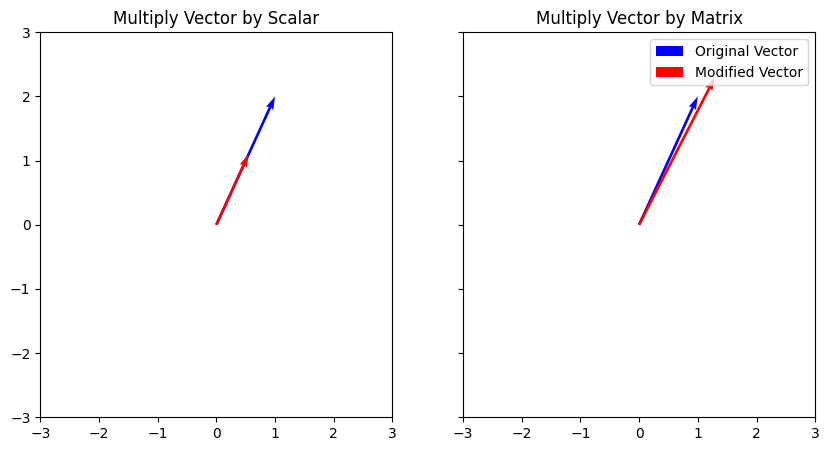

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed so we can get repeatable results for the documentation.
# Remove this line to allow the matrices and vectors to be random.
np.random.seed(3)

# Create a vector to test
vector = np.array([[1],
                   [2]])

# Now create a random scalar
scalar = np.random.random()
print('Scalar:')
print(scalar)

# Now create a random matrix
matrix = np.random.random((2,2))
print('Matrix:')
print(matrix)

# Now multiply the vector by the scalar, and multiply the vector by the matrix
vector_scalar = scalar*vector
vector_matrix = matrix@vector # Matrix multiplication is @ in numpy.

# Now plot them
fig, ax = plt.subplots(1,2,figsize=(10,5), sharex=True,sharey=True)
ax[0].quiver(*vector, color='blue', angles='xy', scale_units='xy', scale=1)
ax[0].quiver(*vector_scalar, color='red', angles='xy', scale_units='xy', scale=1)
ax[0].set_title('Multiply Vector by Scalar')
ax[1].quiver(*vector, color='blue', angles='xy', scale_units='xy', scale=1)
ax[1].quiver(*vector_matrix, color='red', angles='xy', scale_units='xy', scale=1)
ax[1].legend(['Original Vector','Modified Vector'])
ax[1].set_title('Multiply Vector by Matrix')
ax[0].set_ylim([-3,3])
ax[0].set_xlim([-3,3]);

Clearly, multiplying by a scalar has resulted in a vector with the same direction and a different length, whereas multiplying by a matrix has changed not only the length, but also the direction of the vector.

The resulting direction of the vector will not only be dependent on the matrix that it is multiplied by, but also the original vector itself.  Multiplying different vectors by the same matrix will generally result in a different final direction of the resulting vectors.  We can investigate this by multiplying many different vectors by the matrix from the previous step.

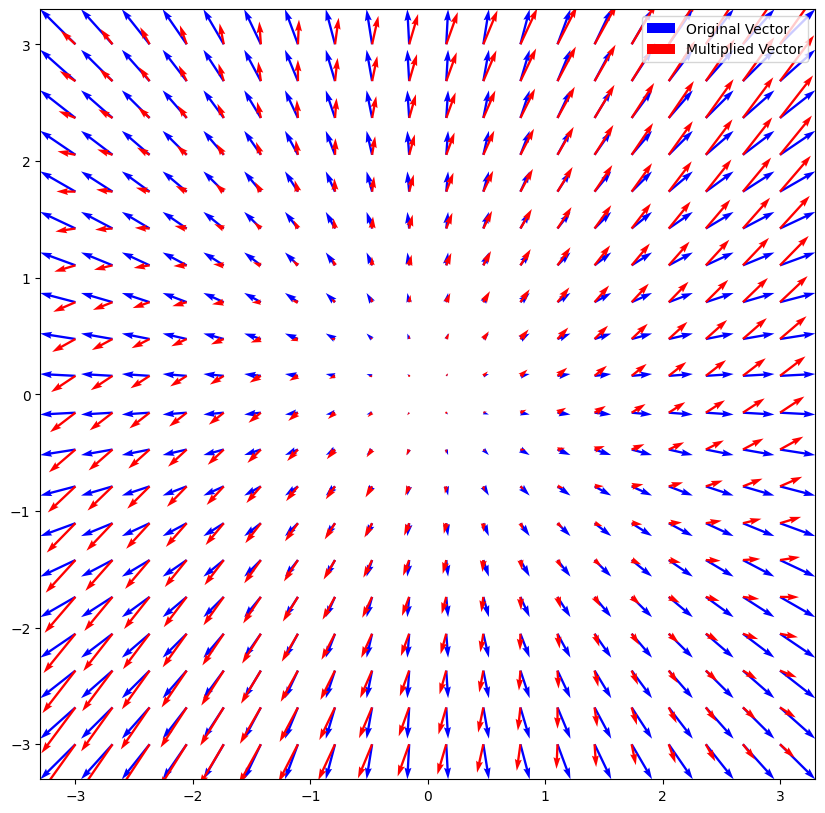

In [2]:
# Here we make a 20x20 grid of 2x1 vectors that we can multiply by our matrix
vectors = np.mgrid[-3:3:20j,-3:3:20j][np.newaxis].transpose()

scaled_vectors = matrix @ vectors

# Reshape for easier plotting
vectors_for_plotting = vectors.reshape(-1,2).transpose()
scaled_vectors_for_plotting = scaled_vectors.reshape(-1,2).transpose()
fig, ax = plt.subplots(figsize=(10,10))
ax.quiver(*vectors_for_plotting, *vectors_for_plotting, color='blue', angles='xy', scale_units='xy', scale=10)
ax.quiver(*vectors_for_plotting, *scaled_vectors_for_plotting, color='red', angles='xy', scale_units='xy', scale=10)
ax.legend(['Original Vector','Multiplied Vector']);

Clearly, we can see that in general, vectors in different directions will be modified by the matrix differently.  However, looking closely at the above plot, we can see that there are vectors in particular directions that maintain their original direction after multiplication by the matrix (a change in length is acceptable).  And if you recall, we are looking for exactly such a vector that when multiplied by a matrix retains its direction.  Therefore, in order to  solve the eigenvalue equation listed previously, we need to find these special directions.  We can't just use any shape $\mathbf{\phi}$.  We have to find particular shapes $\mathbf{\phi}$ that when multiplied by the system matrices $\mathbf{M}^{-1}\mathbf{K}$ do not change shape but perhaps get bigger or smaller.  Mathematically, we call these vectors the *eigenvectors* where the prefix *eigen* is German for *particular*.  In structural dynamics, we call these particular shapes the *mode shapes*, and they have many special properties.

Similarly, we call the scalar quantity $\omega^2$ that gets multiplied by the eigenvector the *eigenvalue*.  It is the particular value that goes along with the particular vector.  We will generally have as many eigenvector/eigenvalue pairs as we have degrees of freedom in the system.

We note that there are linear algebra tools available to solve for the eigenvalues and eigenvectors of a given matrix.  For example, in Numpy, we can use `np.linalg.eig`.  We can then plot the eigenvector directions on the above figure to show that they indeed align with the directions where the vectors are scaled but the direction does not change.  Note also that there are two degrees of freedom in this problem, so we find two eigenvectors, or two directions where the direction of the vectors do not change.

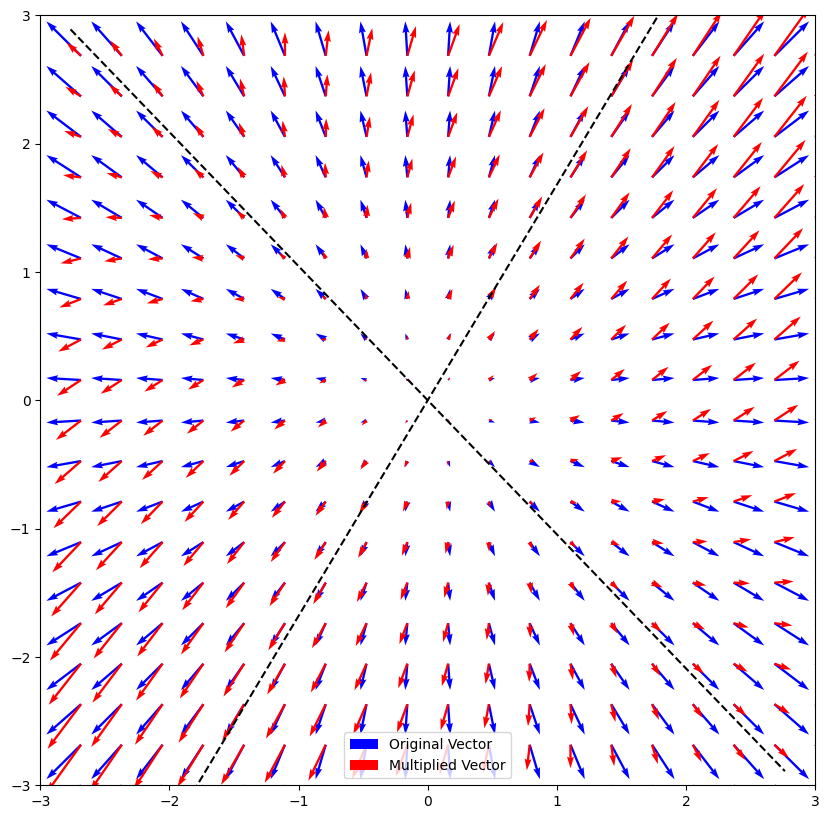

In [3]:
eigenvalues, eigenvectors = np.linalg.eig(matrix)
# Plot the positive and negative eigenvectors so it looks like a line through the origin
# Also reshape them so they are easier to plot
# Multiply by 4 so they take up the whole plot
eigenvectors_to_plot = 4*np.array((eigenvectors,-eigenvectors)).transpose(1,0,2)
ax.plot(*eigenvectors_to_plot,'k--')
ax.set_ylim([-3,3])
ax.set_xlim([-3,3])
fig

We see that vectors that are along the directions represented by the eigenvectors do not change direction, only change scale.

Without approximation or loss of generality, we can take *all* of the eigenvectors or mode shapes of a system as column vectors and *stack* them side-by-side to form a matrix.  This matrix forms a coordinate transformation: in the same way we can transform between a local and global coordinate system, we can also transform between *physical* and *modal* degrees of freedom.  Physical degrees of freedom are generally represented by some physical quantity (e.g., Point 1 moves 2.5 centimeters in the vertical direction).  Modal degrees of freedom are generally represented by some *modal degree of freedom* or *modal quantity*.  Motions are then represented by how much of each mode shape is present in the motion (e.g., the system moves with a shape that looks like mode shape 1 scaled up by a factor of 2, plus mode shape 2 scaled down by a factor of 1/2).  We can represent this mathematically by saying physical motions $\mathbf{x}$ are represented by a linear combination of shapes $\mathbf{\phi}$.  We call the coefficient matrix $\mathbf{q}$ the *modal coefficients* or *modal degrees of freedom*, because they describe how much of each mode shape in $\mathbf{\phi}$ is present in $\mathbf{x}$.
$$\mathbf{x} = \mathbf{\phi}\mathbf{q}$$

We can substitute this transformation into our original undamped equations of motion to get equations of motion in terms of the modal degrees of freedom $\mathbf{q}$.
$$\mathbf{M}\mathbf{\phi}\ddot{\mathbf{q}} + \mathbf{K}\mathbf{\phi}{\mathbf{q}} = \mathbf{F}$$

We note that the mode shapes $\mathbf{\phi}$ are invariant in time, (they are a function of the matrices $\mathbf{M}$ and $\mathbf{K}$, which are also invariant in time).  Therefore taking the derivative of the physical response $\mathbf{x}$ is simply
$$\ddot{\mathbf{x}} = \mathbf{\phi}\ddot{\mathbf{q}}$$

While the transformed equation above is technically valid, we generally do not like this form, because it breaks the symmetry of the mass and stiffness matrices.  For all real structures, the mass, stiffness, and damping matrices should be symmetric.  This is a function of Netwton's third law of equal and opposite reactions: if there is a force developing at degree of freedom 1 due to motion of degree of freedom 2, an equal and opposite force will develop on degree of freedom 2 due to degree of freedom 1 pushing back on it.  Currently, however, in our transformed equations of motion, the new effective mass matrix $\mathbf{M}\mathbf{\phi}$ is not symmetric, nor is the equivalent effective stiffness matrix.  We therefore premultiply the equations of motion by $\mathbf{\phi}^T$.

$$\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}\ddot{\mathbf{q}} + \mathbf{\phi}^T\mathbf{K}\mathbf{\phi}{\mathbf{q}} = \mathbf{\phi}^T\mathbf{F}$$

In this final format, the effective mass and stiffness matrices $\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}$ and $\mathbf{\phi}^T\mathbf{K}\mathbf{\phi}$ are symmetric.  We will often make a substitution
$$\tilde{\mathbf{M}}=\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}$$
$$\tilde{\mathbf{K}}=\mathbf{\phi}^T\mathbf{K}\mathbf{\phi}$$
where $\tilde{\mathbf{M}}$ and $\tilde{\mathbf{K}}$ are referred to as the *modal mass* and *modal stiffness* matrices.  The modal system of equations is then

$$\tilde{\mathbf{M}}\ddot{\mathbf{q}} + \tilde{\mathbf{K}}{\mathbf{q}} = \mathbf{\phi}^T\mathbf{F}$$

The symmetry of the system matrices is not the only interesting property when we transform into modal coordinates.  It turns out that the mode shapes $\mathbf{\phi}$ *diagonalize* the mass and stiffness matrices.  The modal mass and stiffness matrices, formed by pre- and post-multiplying the mass and stiffness matrices by the mode shapes, are diagonal.  This physically means that there is no coupling between modal degrees of freedom; the response of mode 1 does not depend at all on the response of mode 2.  They can be treated as entirely separate equations.  Compare this to a physical mass and stiffness matrix, where there would be coupling between the degrees of freedom.

We can think about this concept physically.  In the physical domain, if I pluck the end of a beam, all of the degrees of freedom on the beam will eventually vibrate.  This is because the physical degrees of freedom are all connected to one another through the mass and stiffness of a beam.  In the modal domain, however, if I pluck "mode 1" (an admittedly hard thing to accomplish in practice, as you would need to deform the beam into its first mode shape and then let it go instantaneously), none of the other modes will be excited at all, because there is no coupling between them.  Note that this still means that the entire beam will vibrate, because the mode shape of the beam contains all the beam degrees of freedom, so if the mode shape vibrates, the whole beam vibrates.  In fact because the modal representation described above is exact, plucking the end of a beam will result in exactly the same beam motion regardless of whether it is represented by modal or physical degrees of freedom.  The modal transformation is simply a different way to represent a dynamic system.

### An Infinite Number of Mode Shapes
One last concept to describe before we move on is the concept of mode shape scaling.  From the previous figure, we saw that each eigenvector of a matrix mostly represented a particular direction, rather than a specific vector.  Any vector in that direction would be only scaled by the matrix instead of having its direction modified.  Therefore, eigenvectors are only really unique up to a scale factor.  An eigenvector times a scalar is still a valid eigenvector of a matrix, so you could argue there are an infinite number of eigenvectors of any matrix.

Rather than allowing for any arbitrary scaling of eigenvectors, we will often scale them to some preferred normalization.  One might, for example, scale an eigenvector such that it has a length of 1, i.e. make it a unit vector.  Another might, for example, scale a specific degree of freedom to 1.  The most common scaling on an eigenvector, particularly in the context of structural dynamics where an eigenvector represents a mode shape, is to scale the eigenvectors such that the modal mass matrix $\tilde{\mathbf{M}}$ is equal to the identity matrix.  This is known as *mass normalization*.  We have already described how the modal mass matrix is diagonal.  To mass-normalize a mode shape, we only need to scale the mode shape such that the diagonal entries obtained when computing the modal mass matrix end up being 1.  To do this for the $r$th mode, we can simply compute the modal mass matrix with a single unscaled mode shape $\tilde{\mathbf{\phi}}_r$, then divide the mode shapes by the square-root of the diagonal entry of the modal mass matrix corresponding to that mode shape.

$$\mathbf{\phi}_r = \frac{\tilde{\mathbf{\phi}}_r}{\sqrt{{\tilde{\mathbf{\phi}}_r}^T\mathbf{M}\tilde{\mathbf{\phi}}_r}}$$

When we compute the modal stiffness using mass normalized modes, the entries on the diagonal of the modal stiffness matrix will be equal to the natural frequency squared.  For example, for the $r$th mode shape:

$${\mathbf{\phi}_r}^T\mathbf{K}\mathbf{\phi}_r = {\omega_r}^2$$

### Units with Scaled Mode Shapes
Note that when we mass-normalize the mode shapes, the mode shapes will have a unit of $\frac{1}{\sqrt{m}}$.  The mass matrix has dimensions of $m$ where $m$ is the unit of mass, and to equal the dimensionless identity matrix when the modal mass matrix is assembled, the mode shape units from pre- and post-multiplying must cancel out the units of the mass matrix.  The modal coefficient $\mathbf{q}$ must then have units of ${l}{\sqrt{m}}$ where $l$ is a length dimension, and one must recall that taking a derivative over time adds a $\frac{1}{t}$ where $t$ is the unit representing time.

As an example, we will assume we have a meter/kilogram/newton/second unit system.  The modal transformation equation must have consistent units.
$$ \mathbf{x} = \mathbf{\phi}\mathbf{q}$$
$$ \left[m\right] = \left[\frac{1}{\sqrt{kg}}\right]\left[m\sqrt{kg}\right]$$

Similarly, the equations of motion must have consistent units.
$$\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}\ddot{\mathbf{q}} + \mathbf{\phi}^T\mathbf{K}\mathbf{\phi}{\mathbf{q}} = \mathbf{\phi}^T\mathbf{F}$$
$$\left[\frac{1}{\sqrt{kg}}\right]\left[kg\right]\left[\frac{1}{\sqrt{kg}}\right]\left[\frac{m\sqrt{kg}}{s^2}\right] + \left[\frac{1}{\sqrt{kg}}\right]\left[\frac{N}{m}\right]\left[\frac{1}{\sqrt{kg}}\right]\left[m\sqrt{kg}\right] = \left[\frac{1}{\sqrt{kg}}\right]\left[N\right]$$

We can substitute $\left[N\right] = \left[\frac{kg{\,}m}{s^2}\right]$
$$\left[\frac{1}{\sqrt{kg}}\right]\left[kg\right]\left[\frac{1}{\sqrt{kg}}\right]\left[\frac{m\sqrt{kg}}{s^2}\right] + \left[\frac{1}{\sqrt{kg}}\right]\left[\frac{kg{\,}m}{m{\,}s^2}\right]\left[\frac{1}{\sqrt{kg}}\right]\left[m\sqrt{kg}\right] = \left[\frac{1}{\sqrt{kg}}\right]\left[\frac{kg{\,}m}{s^2}\right]$$

Then with a good deal of cancelling units
$$\left[\frac{m\sqrt{kg}}{s^2}\right] + \left[\frac{m\sqrt{kg}}{s^2}\right] = \left[\frac{m\sqrt{kg}}{s^2}\right]$$

### Adding Damping
Eventually, we will need to consider the damping values that we simply disregarded previously.  If we bring back our original damped system of equations, and transform to modal space, we end up with the following equations of motion:
$$\mathbf{M}\ddot{\mathbf{x}} + \mathbf{C}\dot{\mathbf{x}} + \mathbf{K}{\mathbf{x}} = \mathbf{F}$$
$$\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}\ddot{\mathbf{q}} + \mathbf{\phi}^T\mathbf{C}\mathbf{\phi}\dot{\mathbf{q}} + \mathbf{\phi}^T\mathbf{K}\mathbf{\phi}{\mathbf{q}} = \mathbf{\phi}^T\mathbf{F}$$
$$\tilde{\mathbf{M}}\ddot{\mathbf{q}} + \tilde{\mathbf{C}}\dot{\mathbf{q}} + \tilde{\mathbf{K}}{\mathbf{q}} = \mathbf{\phi}^T\mathbf{F}$$

Here the matrix $\tilde{\mathbf{C}} = \mathbf{\phi}^T\mathbf{C}\mathbf{\phi}$ is referred to as the modal damping matrix.

The important consideration that we must make to determine if the mode shapes that we have computed are still valid mode shapes is to understand if the modal damping matrix is also diagonalized by the mode shape matrix.  If it is, then our mode shapes are still valid: they represent independent, uncoupled degrees of freedom in our system.  However if the modal damping matrix is not diagonal, that means there is coupling between the degrees of freedom, and the degrees of freedom represented by the equation are not actually modal degrees of freedom.

The mode shapes can diagonalize the damping matrix, but only in a very limited case.  Since the mode shapes only decouple the mass and stiffness matrices from which they were computed, the damping matrix will only be decoupled completely if the physical damping matrix is a linear combination of the physical mass and stiffness matrices.

$$\mathbf{C} = \alpha\mathbf{M} + \beta\mathbf{K}$$

This is known as *proportional damping*, where the damping is proportional to the mass and stiffness of the system.  Transforming to modal coordinates will diagonalize this matrix.  If we do have proportional damping, and we use mass normalized modes for the modal transformation, the modal damping matrix will be diagonal, and the entry corresponding to the $r$th mode will be equal to

$$\tilde{\mathbf{C}}_{rr} = {\mathbf{\phi}_r}^T\mathbf{C}\mathbf{\phi}_r = 2\zeta_r\omega_r = \alpha+\beta\omega_r^2$$

where $\omega_r$ is the natural frequency and $\zeta_r$ is the fraction of critical damping for mode $r$.

We only get a diagonal modal damping matrix in this case.  For any other case, we will still have off-diagonal terms.  Luckily for us, these diagonal terms are often small, so using the real mode shapes derived from the mass and stiffness of the system is not a terrible approximation.  However, there are cases where the approximation is not good, and in those cases, we need to turn to a different toolset to help us analyze the system.

## Complex Modes -- The General Solution
A more general solution to decoupling damped vibration problems requires us to rearange our equations of motion.  Rather than treating the system of equations as $N$ equations with a second order derivative, we will instead treat the system of equations as $2N$ first-order equations using a simple introducton of a new variable $\mathbf{v} = \dot{\mathbf{x}}$ to represent velocity.  In this way, we can eliminate the double-derivative in the acceleration term ($\ddot{\mathbf{x}} = \dot{\mathbf{v}}$)

$$\mathbf{M}\dot{\mathbf{v}} + \mathbf{C}\dot{\mathbf{x}} + \mathbf{K}{\mathbf{x}} = \mathbf{F}$$

However, we now need to add some relationship between $v$ and $x$.  We could simply write $\mathbf{v} = \dot{\mathbf{x}}$ as we showed above.  However, it will be useful to keep our matrices symmetric, so we will construct the equations in a slightly more complex way.

$$\mathbf{M}\dot{\mathbf{x}} - \mathbf{M}\mathbf{v} = \mathbf{0}$$

We can combine these two sets of equations into one set of equations of the form $\mathbf{A}\dot{\mathbf{z}}+\mathbf{B}\mathbf{z} = \mathbf{u}$.

$$ \begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\begin{bmatrix}\dot{\mathbf{v}}\\\dot{\mathbf{x}}\end{bmatrix} + \begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}{\mathbf{v}}\\{\mathbf{x}}\end{bmatrix} = \begin{bmatrix}\mathbf{0}\\\mathbf{F}\end{bmatrix}$$
Here we note that our coefficient matrices are both symmetric, the first term contains all of the derivatives, the second term contains no derivatives, and the right-hand side of the equation contains our input forces.

We can perform a similar operation as previous to try to understand the free response of the system.  We will make the following assumptions.

- $\begin{bmatrix}\mathbf{0}\\\mathbf{F}\end{bmatrix} = \begin{bmatrix}\mathbf{0}\\\mathbf{0}\end{bmatrix}$ -- The force into the system is zero.
- $\begin{bmatrix}\mathbf{v}\\\mathbf{x}\end{bmatrix} = \begin{bmatrix}\lambda\mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}e^{\lambda t}$ -- The response is a complex sinusoid.

In this case, the first assumption is essentially identical to the first assumption in the real mode shape case.  The second assumption is essentially a complex generalization of the second assumption made in the real mode shape case.  In this generalization, instead of a "real" shape where all responses are either in-phase or 180$^\circ$ out-of-phase, the shape can now be complex, meaning there can be any phasing between different values in the shape.  The exponential $e$ now represents an oscillatory portion and decaying or growing portion of the response ($\lambda$ is in general a complex number.  The imaginary portion of it will result in sinusoidal motion of the form $e^{j\theta} = \cos{\theta} + j\sin{\theta}$ where $j = \sqrt{-1}$.  The real part will result in exponential decay or exponential growth of the form $e^{x}$).  The term $\lambda$ appears on the first row of the second assumption due to the chain rule when differentiating $\mathbf{v} = \dot{x}$.

Using the chain rule for differentiation, we can also say $\begin{bmatrix}\dot{\mathbf{v}}\\\dot{\mathbf{x}}\end{bmatrix} = \lambda\begin{bmatrix}\lambda\mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}e^{\lambda t}$

We can then apply these assumptions to our equations of motion:

$$ \begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\left(\lambda \begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}e^{\lambda t}\right) + \begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}e^{\lambda t} = \begin{bmatrix}\mathbf{0}\\\mathbf{0}\end{bmatrix}$$

We can again recognize that the term $e^{\lambda t}$ is in general nonzero and therefore can be cancelled.

$$ \begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\left(\lambda \begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}\right) + \begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix} = \begin{bmatrix}\mathbf{0}\\\mathbf{0}\end{bmatrix}$$

We can then subtract $\begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}$ from both sides of the equation and we end up with

$$ \lambda \begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix} = - \begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}$$

While a little more complex, this equation is also a [Generalized Eigenvalue Problem](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix#Generalized_eigenvalue_problem).

Transforming the eigenvalues and eigenvectors into natural frequencies and mode shapes is not as straightforward in the present case with complex modes.  In general, we will solve for $2N$ complex eigenvalues; however, due to the fact that the matrices are real, the eigenvalues will be complex conjugates of one another.  We will often hear these values called *poles* because they are zeros of the denominator polynomials in the frequency response function formulation that we will discuss later.

The eigenvalues $\lambda$ are often expressed as a function of the critical damping ratio $\zeta$ and the natural frequency $\omega$.  For the $r$th mode,

$$\lambda_r = -\zeta_r \omega_r + j\omega_r\sqrt{1-\zeta_r^2}$$

The real part $-\zeta_r \omega_r$ drives the exponential decay of the sinusoid.  The imaginary part drives the oscillatory behavior.  Because of this, the term $\omega_r\sqrt{1-\zeta_r}$ is often referred to as the *damped natural frequency* $\omega_d$

$$\omega_{dr} = \omega_r\sqrt{1-\zeta_r^2}$$

To recover the natural frequency $\omega_r$, we can simply take the magnitude of the eigenvalue.

$$\left|\lambda_r\right| = \sqrt{\Re{(\lambda_r)}^2 + \Im{(\lambda_r)}^2} = \sqrt{(\zeta_r^2 \omega_r^2) + (\omega_r^2 (1-\zeta_r^2))} = \sqrt{\omega_r^2 + \omega_r^2\zeta_r^2 - \omega_r^2\zeta_r^2} = \omega_r$$

To recover the damping ratio, we can divide the negative real part of the eigenvalue by the magnitude of the eigenvalue.

$$- \frac{\Re{(\lambda_r)}}{\left|\lambda_r\right|} = \frac{\zeta_r\omega_r}{\omega_r} = \zeta_r$$ 

Note that for complex modes, the damping is part of the solution to the free vibration problem and appears in the solution, whereas in the real mode case where damping was ignored, it was not.

We will also solve for $2N$ eigenvectors.  These will also appear in complex conjugate pairs.  They will be of the form

$$\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}$$

We can extract the mode shape from the eigenvector simply by selecting the bottom partition of the vector.

The equations to compute the modal mass and modal damping matrices are the same as those used in the case of real modes.  However, in general, the modal mass and modal damping matrices are not diagonal and have complex elements.

$$\tilde{\mathbf{M}}=\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}$$
$$\tilde{\mathbf{C}}=\mathbf{\phi}^T\mathbf{C}\mathbf{\phi}$$

Recall that the eigenvalue problem we solved for was with respect to the generalized form $\mathbf{A}\dot{\mathbf{z}}+\mathbf{B}\mathbf{z} = \mathbf{u}$.  Therefore the eigenvectors will diagonalize these matrices.

$$\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}^T\begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix} = \begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}^T\mathbf{A}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix} = \tilde{\mathbf{A}}$$

$$\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}^T\begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix} = \begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}^T\mathbf{B}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix} = \tilde{\mathbf{B}}$$

We often refer to these matrices $\tilde{\mathbf{A}}$ and $\tilde{\mathbf{B}}$ as the *Modal A* and *Modal B* matrices.

Modal mass is defined in different ways for complex modes.  Some references will treat the diagonal entries in Modal A $\tilde{\mathbf{A}}_{rr}$ directly as the modal mass values.  Other references define the modal mass for the $r$th mode $m_r$ as:

$$\tilde{\mathbf{A}}_{rr} = 2\lambda_r m_r + 2\zeta_r\omega_r m_r = 2j\omega_{dr} m_r$$
$$m_r = \frac{\tilde{\mathbf{A}}_{rr}}{2j\omega_{dr}}$$

It doesn't really matter which definition is used as long as the definition is consistently used when reconstructing responses from modal parameters.  This document will proceed with the modal mass defined as the diagonal terms of $\tilde{\mathbf{A}}$.

We can also see that if we premultiply the eigenvalue equation by our eigenvectors, we get a relationship between the Modal A and Modal B matrices.

$$\tilde{\mathbf{B}}_{rr} = -\lambda_r \tilde{\mathbf{A}}_{rr}$$


## An Example Problem
Before we get too far, let's illustrate some of these concepts with a small example problem.  We will generate a 3-degree-of-freedom problem that we will simulate.  We will explore undamped, proportionally damped, and generally damped cases.

In [4]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

def pretty_print_table(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

# Set up physical matrices
K = np.array([[ 6000, -2000,     0],
              [-2000,  4000, -2000],
              [    0, -2000,  6000]])
M = np.array([[2, 0, 0],
              [0, 3, 0],
              [0, 0, 2]])
alpha = 1.36/2
beta = 0.00154865/2
C_proportional = alpha*M+beta*K

C_general = np.array([[14, -2, 0],
                      [-2, 10, -2],
                      [0, -2, 10]])/2

For the complex mode cases, let's construct the $\mathbf{A}$ and $\mathbf{B}$ matrices.  The $\mathbf{A}$ matrix will depend on damping, the $\mathbf{B}$ matrix will not.

In [5]:
# For convenience, construct a matrix of zeros
Z = np.zeros(M.shape)
# Assemble State Space Matrices
A_undamped = np.block([[Z, M],
                       [M, Z]])
A_proportional = np.block([[Z, M],
                           [M, C_proportional]])
A_general = np.block([[Z, M],
                      [M, C_general]])
B = np.block([[-M, Z],
              [ Z, K]])

Now let's compute the eigenvalues and eigenvectors.  For the 2nd-order eigenvalue using the mass and stiffness matrices directly, we can use the `eigh` function which assumes Hermetian, positive definite matrices.  For the complex mode cases, we will have to use the more general `eig` function.

When using an eigenvalue solver, be wary of the order that matrices occur in the function call.  For example, in the [scipy.linalg.eig documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html), it states the following:

> **scipy.linalg.eig(a, b=None, left=False, right=True, overwrite_a=False, overwrite_b=False, check_finite=True, homogeneous_eigvals=False)**
>
> Solve an ordinary or generalized eigenvalue problem of a square matrix.
> 
> Find eigenvalues w and right or left eigenvectors of a general matrix:
>
> ```python
>  a   vr[:,i] = w[i]        b   vr[:,i]
>  a.H vl[:,i] = w[i].conj() b.H vl[:,i]
>   ```
>
> where `.H` is the Hermitian conjugation.

SciPy uses the definition $\mathbf{A}\mathbf{v} = \lambda\mathbf{B}\mathbf{v}$ for its eigenvalue problem, and our equation we have defined as $- \mathbf{B}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix} = \lambda \mathbf{A}\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}$. Note that what SciPy calls `a` in its function call is what we have defined as $-\mathbf{B}$, and what SciPy calls `b` is what we have defined as $\mathbf{A}$.

In [6]:
# Compute Eigenvalues and Eigenvectors
lam_2ndOrder,E_2ndOrder = la.eigh(K,M)
lam_undamped, E_undamped = la.eig(-B,A_undamped)
lam_proportional, E_proportional = la.eig(-B,A_proportional)
lam_general, E_general = la.eig(-B,A_general)

# Since the half the complex eigenvalues and eigenvectors are complex conjugates of one another,
# we will only keep those corresponding to the eigenvalues with imaginary part > 0
keep_undamped = lam_undamped.imag > 0
keep_proportional = lam_proportional.imag > 0
keep_general = lam_general.imag > 0

# Now reduce to just those we want to keep
lam_undamped = lam_undamped[keep_undamped]
E_undamped = E_undamped[:,keep_undamped]
lam_proportional = lam_proportional[keep_proportional]
E_proportional = E_proportional[:,keep_proportional]
lam_general = lam_general[keep_general]
E_general = E_general[:,keep_general]

# Let's also sort the eigenvalues so they are all ascending
for evals,evects in zip([lam_2ndOrder, lam_undamped, lam_proportional, lam_general],
                        [E_2ndOrder, E_undamped, E_proportional, E_general]):
    isort = np.argsort(np.abs(evals))
    evals[...] = evals[isort]
    evects[...] = evects[:,isort]

Now we can extract the natural frequencies and damping ratios from the eigenvalues.

In [7]:
# Compute natural frequencies
omega_2ndOrder = np.sqrt(lam_2ndOrder)
omega_undamped = np.abs(lam_undamped)
omega_proportional = np.abs(lam_proportional)
omega_general = np.abs(lam_general)

# Compute damping ratios
zeta_undamped = -np.real(lam_undamped)/np.abs(lam_undamped)
zeta_proportional = -np.real(lam_proportional)/np.abs(lam_proportional)
zeta_general = -np.real(lam_general)/np.abs(lam_general)

# Compute damped natural frequencies
omega_d_undamped = omega_undamped*np.sqrt(1-zeta_undamped**2)
omega_d_proportional = omega_proportional*np.sqrt(1-zeta_proportional**2)
omega_d_general = omega_general*np.sqrt(1-zeta_general**2)

Let's plot these datasets in a table.

In [8]:
df = pd.DataFrame(columns = ['Undamped','Proportional Damping','General Damping'],
                  index=['Mass Matrix','Stiffness Matrix','Damping Matrix','Poles','Natural Frequencies','Damping Ratios'],
                  dtype=object)
df.at['Mass Matrix', 'Undamped'] = str(M)
df.at['Mass Matrix', 'Proportional Damping'] = str(M)
df.at['Mass Matrix', 'General Damping'] = str(M)
df.at['Stiffness Matrix', 'Undamped'] = str(K)
df.at['Stiffness Matrix', 'Proportional Damping'] = str(K)
df.at['Stiffness Matrix', 'General Damping'] = str(K)
df.at['Damping Matrix', 'Undamped'] = str(np.zeros(C_proportional.shape))
df.at['Damping Matrix', 'Proportional Damping'] = str(C_proportional)
df.at['Damping Matrix', 'General Damping'] = str(C_general)
df.at['Poles', 'Undamped'] = str(lam_undamped[:,np.newaxis])
df.at['Poles', 'Proportional Damping'] = str(lam_proportional[:,np.newaxis])
df.at['Poles', 'General Damping'] = str(lam_general[:,np.newaxis])
df.at['Natural Frequencies', 'Undamped'] = str(omega_undamped[:,np.newaxis])
df.at['Natural Frequencies', 'Proportional Damping'] = str(omega_proportional[:,np.newaxis])
df.at['Natural Frequencies', 'General Damping'] = str(omega_general[:,np.newaxis])
df.at['Damping Ratios', 'Undamped'] = str(zeta_undamped[:,np.newaxis])
df.at['Damping Ratios', 'Proportional Damping'] = str(zeta_proportional[:,np.newaxis])
df.at['Damping Ratios', 'General Damping'] = str(zeta_general[:,np.newaxis])
pretty_print_table(df)

,Undamped,Proportional Damping,General Damping
Mass Matrix,[[2 0 0] [0 3 0] [0 0 2]],[[2 0 0] [0 3 0] [0 0 2]],[[2 0 0] [0 3 0] [0 0 2]]
Stiffness Matrix,[[ 6000 -2000 0] [-2000 4000 -2000] [ 0 -2000 6000]],[[ 6000 -2000 0] [-2000 4000 -2000] [ 0 -2000 6000]],[[ 6000 -2000 0] [-2000 4000 -2000] [ 0 -2000 6000]]
Damping Matrix,[[0. 0. 0.] [0. 0. 0.] [0. 0. 0.]],[[ 6.00595 -1.54865 0. ] [-1.54865 5.1373 -1.54865] [ 0. -1.54865 6.00595]],[[ 7. -1. 0.] [-1. 5. -1.] [ 0. -1. 5.]]
Poles,[[0.+27.2518998j ] [0.+54.77225575j] [0.+59.92217695j]],[[-0.62753244+27.24467371j] [-1.5014875 +54.75167153j] [-1.73017173+59.89719356j]],[[-0.73753202+27.24242803j] [-1.50037636+54.76028673j] [-1.59542495+59.89042233j]]
Natural Frequencies,[[27.2518998 ] [54.77225575] [59.92217695]],[[27.2518998 ] [54.77225575] [59.92217695]],[[27.25240977] [54.78083727] [59.91166888]]
Damping Ratios,[[-0.] [-0.] [-0.]],[[0.02302711] [0.02741329] [0.02887365]],[[0.027063 ] [0.02738871] [0.02662962]]


We will now look at the eigenvectors.  To start out, we will normalize the eigenvectors **to a value that is NOT equal to unity modal mass or unity Modal A**.  This is useful while we are learning, because if we have unity modal mass, it allows us to be sloppy and simply drop or ignore effects of the modal mass.  This could result in significant errors down the road if we assume that the formulae we developed for the unity modal mass case also apply to the non-unity modal mass case.  It is therefore better to develop and check all the formulae with non-unity modal mass to ensure that we understand its effects and have accounted for it successfully.  We will deliberately normalize to a value not equal to 1, because many eigenvector solvers will automatically normalize for us.

In [9]:
# Normalize Eigenvectors using einsum to pull out the m_ii terms from the modal normalization matrix
# We will multiply by 2 to ensure non-unity modal mass.
E_2ndOrder = 2*E_2ndOrder/np.sqrt(np.einsum('ji,jk,ki->i',E_2ndOrder,M,E_2ndOrder))
E_undamped = 2*E_undamped/np.sqrt(np.einsum('ji,jk,ki->i',E_undamped,A_undamped,E_undamped))
E_proportional = 2*E_proportional/np.sqrt(np.einsum('ji,jk,ki->i',E_proportional,A_proportional,E_proportional))
E_general = 2*E_general/np.sqrt(np.einsum('ji,jk,ki->i',E_general,A_general,E_general))

Now that we have the eigenvectors normalized to a non-unity modal mass, we will compute the Modal Mass and Modal A matrices to extract the modal mass.

We will use `np.einsum` in the same way we used previously but here we will describe it a bit better.  Numpy's `einsum` function implements a generalized version of Einstein Summation Notation.  While we can represent matrix operations like multiplication simply by using symbols for the matrices
$$\mathbf{C} = \mathbf{A}\mathbf{B}$$
we can also represent those operations with the indices
$$C_{ik} = A_{ij}B_{jk}$$
In the previous equation, we have the index $i$ representing the rows of $\mathbf{A}$, and the index $j$ representing the columns.  Similarly for $\mathbf{B}$, we have the indices $j$ representing the rows and $k$ representing the columns.  When we do matrix multiplication, we sum over the inner dimension, e.g., the $j$ indices, and that index drops out.  We are left with rows $i$ and columns $k$ of our output matrix $\mathbf{C}$.  This operation would be represented in Numpy's `einsum` function as
```python
C = np.einsum('ij,jk->ik',A,B)
```
The first argument `'ij,jk->ik'` is a string that gives the index operations to be performed.  We see that there is an arrow `->` that separates input indices and output indices, and the different input indices are separated by a comma, and there is only one set of output indices.  The remaining arguments are the actual matrices corresponding to the input indices passed in the first argument.  Therefore `ij` will be associated with `A`, and `jk` will be associated with `B`.  The output indices on the right side of the arrow `ik` will be associated with the function's output `C`.  We note that any index not listed in the output indices will be summed over and drop out.

This notation is very useful for writing complex matrix expressions in a compact way.  For example, if instead of $\mathbf{C} = \mathbf{A}\mathbf{B}$ we wanted to do $\mathbf{C} = \mathbf{A}^T\mathbf{B}$, we can simply swap the indices on $\mathbf{A}$, which now means we are summing across the rows of $\mathbf{A}$, which is equivalent to matrix multiplication by a transpose.
$$\mathbf{C} = \mathbf{A}^T\mathbf{B}$$
$$C_{ik} = A_{ji}B_{jk}$$

We can therefore represent a more complex product like
$$\tilde{\mathbf{M}}=\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}$$
as
$$\tilde{{M}}_{il}={\phi}_{ji}{M}_{jk}{\phi}_{kl}$$
In the previous equation, we can see that the $j$ index corresponds to the rows of the mass matrix and the rows of the mode shape matrix.  Because we sum over $j$, this is equivalent to multiplying the matrix $\mathbf{M}$ by $\mathbf{\phi}^T$.  We can indeed improve upon this if, for example, we wanted a 1D array of modal mass values, rather than a 2D matrix that we will then need to extract the diagonals from.  We can replace the $l$ index with another $i$ index and have the output specify just a single $i$, and we will get a 1D array of modal mass values.  As an aside, this is a syntax that is not acceptable in true Einstein Summation Notation, where a repeated index is automatically summed over.  In Numpy's generalized version, it subverts some of these very strict rules to give more flexibility to the user.
$$\tilde{{M}}_{i}={\phi}_{ji}{M}_{jk}{\phi}_{ki}$$

We can then perform these operations in code to solve for the modal mass and modal A quantities.

In [10]:
mm_2ndOrder = np.einsum('ji,jk,ki->i',E_2ndOrder,M,E_2ndOrder)
ma_undamped = np.einsum('ji,jk,ki->i',E_undamped,A_undamped,E_undamped)
ma_proportional = np.einsum('ji,jk,ki->i',E_proportional,A_proportional,E_proportional)
ma_general = np.einsum('ji,jk,ki->i',E_general,A_general,E_general)

The last thing we will do is to pull out the mode shapes from the eigenvectors.  For the 2nd Order case, the mode shapes are the eigenvectors.  But for the complex case, the mode shapes are the lower half of the eigenvector matrix.

In [11]:
phi = E_2ndOrder
psi_undamped = E_undamped[E_undamped.shape[0]//2:,:]
psi_proportional = E_proportional[E_proportional.shape[0]//2:,:]
psi_general = E_general[E_general.shape[0]//2:,:]

We should be able to check that the top half of the eigenvector matrix is the bottom half multiplied by the eigenvalue.

$$\begin{bmatrix}\lambda \mathbf{\psi}\\\mathbf{\psi}\end{bmatrix}$$

In [12]:
E_general[:E_general.shape[0]//2,:]

array([[-1.16839552-1.20937963j,  3.7348689 +3.68391729j,
        -3.16635239-3.71568777j],
       [-2.60749708-2.75808733j, -0.10439594+0.09881697j,
         2.00036437+2.07501753j],
       [-1.15358519-1.22327319j, -3.46966805-3.92680586j,
        -3.52944456-3.37788878j]])

In [13]:
lam_general*psi_general

array([[-1.16839552-1.20937963j,  3.7348689 +3.68391729j,
        -3.16635239-3.71568777j],
       [-2.60749708-2.75808733j, -0.10439594+0.09881697j,
         2.00036437+2.07501753j],
       [-1.15358519-1.22327319j, -3.46966805-3.92680586j,
        -3.52944456-3.37788878j]])

One final thing to note is that in general, the mode shapes extracted from a complex analysis will not diagonalize the orignal mass, stiffness, or damping matrices, as these were not the matrices the eigensolution was performed on.  There will be off-diagonal terms, and they will be complex.

In [14]:
psi_general.T@M@psi_general

array([[-6.13061679e-08-7.34176433e-02j, -1.43810774e-04+9.83528782e-06j,
         1.15410477e-04+2.13846966e-06j],
       [-1.43810774e-04+9.83528782e-06j, -1.24812005e-07-3.65342888e-02j,
        -1.36140173e-04+1.88235958e-06j],
       [ 1.15410477e-04+2.13846966e-06j, -1.36140173e-04+1.88235958e-06j,
         1.86118173e-07-3.33825843e-02j]])

In [15]:
psi_general.T@C_general@psi_general

array([[-0.00014982-0.10829239j,  0.00048468+0.01181488j,
         0.00045558-0.01005105j],
       [ 0.00048468+0.01181488j, -0.00125664-0.1096167j ,
        -0.00020565+0.01561439j],
       [ 0.00045558-0.01005105j, -0.00020565+0.01561439j,
         0.00140645-0.10654111j]])

In [16]:
psi_general.T@K@psi_general

array([[-6.49635076e-05-5.45227499e+01j,  2.15177460e-01-2.97517095e-03j,
        -1.87975974e-01-1.36004490e-02j],
       [ 2.15177460e-01-2.97517095e-03j, -1.51087546e-03-1.09568400e+02j,
         4.46495302e-01+1.79584080e-02j],
       [-1.87975974e-01-1.36004490e-02j,  4.46495302e-01+1.79584080e-02j,
         1.57583896e-03-1.19907950e+02j]])

## Frequency Response Functions and Modal Parameters
Now that we have familiarized ourselves with the modal parameters for real and complex modes, let's discuss the relationship to the frequency response function.  This is of utmost importance, because we eventually would like to fit the modal parameters from the frequency response functions, as well as reconstruct frequency response functions from the modal parameters.

### Real Modes

Starting with the modal system of equations, and assuming proportional damping, we have

$$\mathbf{\phi}^T\mathbf{M}\mathbf{\phi}\ddot{\mathbf{q}} + \mathbf{\phi}^T\mathbf{C}\mathbf{\phi}\dot{\mathbf{q}} + \mathbf{\phi}^T\mathbf{K}\mathbf{\phi}{\mathbf{q}} = \mathbf{\phi}^T\mathbf{F}$$
$$\tilde{\mathbf{M}}\ddot{\mathbf{q}} + \tilde{\mathbf{C}}\dot{\mathbf{q}} + \tilde{\mathbf{K}}{\mathbf{q}} = \mathbf{\phi}^T\mathbf{F}$$
We can also substitute in the diagonal values for the modal parameters.  *Note the inclusion of the modal mass* $m_r$ *in all terms, because we have not assumed mass normalized modes in this case*.  We will represent the generalized modal force $\mathbf{\phi}^T\mathbf{F}$ as $\mathbf{Q}$.
$$\left[m_r\right]\ddot{\mathbf{q}} + \left[2\zeta_r\omega_r m_r\right]\dot{\mathbf{q}} + \left[\omega_r^2m_r\right]{\mathbf{q}} = \mathbf{Q}$$

We can then use the *Laplace Transform* to make this differential equation into an algebraic one.
$$\left[m_r\right]s^2{\mathbf{q}} + \left[2\zeta_r\omega_r m_r\right]s{\mathbf{q}} + \left[\omega_r^2m_r\right]{\mathbf{q}} = \mathbf{Q}$$
We can collect terms of $\mathbf{q}$ to create an equation of the form $\mathbf{A}\mathbf{x} = \mathbf{b}$.
$$\left[m_rs^2 + 2\zeta_r\omega_r m_rs + \omega_r^2m_r\right]{\mathbf{q}} = \mathbf{Q}$$

Because the equation is diagonal, inverting the coefficient matrix is trival.
$${\mathbf{q}} = \left[\frac{1}{m_rs^2 + 2\zeta_r\omega_r m_rs + \omega_r^2m_r}\right]\mathbf{Q}$$

This is now a representation of a *modal* transfer function.  If we apply a set of *modal* forces $\mathbf{Q}$, we get out a set of *modal* responses $\mathbf{q}$.  To transform to physical space, we need to transform our modal quantities to physical quantities.  We know the substitution for modal forces $\mathbf{Q} = \mathbf{\phi}^T\mathbf{F}$, and we know our equation for physical response from modal responses $\mathbf{x} = \mathbf{\phi}\mathbf{q}$.  Therefore we can make the subsitution for modal force, and pre-multiply the entire equation by the mode shape matrix.

$$\mathbf{x} = \mathbf{\phi}{\mathbf{q}} = \mathbf{\phi}\left[\frac{1}{m_rs^2 + 2\zeta_r\omega_r m_rs + \omega_r^2m_r}\right]\mathbf{\phi}^T\mathbf{F}$$

If instead of the entire Laplace domain we only consider sinusoidal responses, we can substitute $s=j\omega$ to get the familiar form for the frequency response function.

$$\mathbf{H} = \mathbf{\phi}\left[\frac{1}{-m_r\omega^2 + 2j\zeta_r\omega_r m_r\omega + \omega_r^2m_r}\right]\mathbf{\phi}^T$$

$$\mathbf{H} = \sum_{r=1}^N\frac{\mathbf{\phi}_r\mathbf{\phi}_r^T}{-m_r\omega^2 + 2j\zeta_r\omega_r m_r\omega + \omega_r^2m_r}$$

To pull out a specific entry in the FRF matrix, we can index the mode shapes.

$$\mathbf{H}_{ij} = \sum_{r=1}^N\frac{\phi_{ir}\phi_{jr}}{-m_r\omega^2 + 2j\zeta_r\omega_r m_r\omega + \omega_r^2m_r}$$

### Complex Modes
The derivation for the frequency response function in terms of complex modes is similar.  Recall that our physical vector for the complex state space formulation includes velocities and displacements.  Similarly our eigenvectors consisted of pairs of shapes, the shape and its complex conjugate.  Therefore, in the case of complex modes, the projection from modal space to physical space is

$$\begin{bmatrix}\mathbf{v}\\\mathbf{x}\end{bmatrix} = \begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\mathbf{q}\\\mathbf{q}^*\end{bmatrix}$$

Applying the transformation to the complex state space equation

$$ \begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\begin{bmatrix}\dot{\mathbf{v}}\\\dot{\mathbf{x}}\end{bmatrix} + \begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}{\mathbf{v}}\\{\mathbf{x}}\end{bmatrix} = \begin{bmatrix}\mathbf{0}\\\mathbf{F}\end{bmatrix}$$

Gives

$$ \begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\dot{\mathbf{q}}\\\dot{\mathbf{q}}^*\end{bmatrix} + \begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\mathbf{q}\\\mathbf{q}^*\end{bmatrix} = \begin{bmatrix}\mathbf{0}\\\mathbf{F}\end{bmatrix}$$

And then pre-multiplying by the eigenvector matrix transpose completes the transformation into modal space.

$$ \begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}^T\begin{bmatrix}\mathbf{0} & \mathbf{M} \\ \mathbf{M} & \mathbf{C}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\dot{\mathbf{q}}\\\dot{\mathbf{q}}^*\end{bmatrix} + \begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}^T\begin{bmatrix} -\mathbf{M} & \mathbf{0} \\ \mathbf{0} & \mathbf{K}\end{bmatrix}\begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\mathbf{q}\\\mathbf{q}^*\end{bmatrix} = \begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}^T\begin{bmatrix}\mathbf{0}\\\mathbf{F}\end{bmatrix}$$
$$= \begin{bmatrix}\lambda \mathbf{\psi}^T & \mathbf{\psi}^T \\ \lambda^* {\mathbf{\psi}^*}^T & {\mathbf{\psi}^*}^T\end{bmatrix}\begin{bmatrix}\mathbf{0}\\\mathbf{F}\end{bmatrix} = \begin{bmatrix}\mathbf{\psi}^T \\ {\mathbf{\psi}^*}^T\end{bmatrix}\mathbf{F}$$

Transforming into the modal matrices
$$\tilde{\mathbf{A}}\begin{bmatrix}\dot{\mathbf{q}}\\\dot{\mathbf{q}}^*\end{bmatrix} + \tilde{\mathbf{B}}\begin{bmatrix}{\mathbf{q}}\\{\mathbf{q}}^*\end{bmatrix} = \begin{bmatrix}\mathbf{Q} \\ \mathbf{Q}^*\end{bmatrix}$$
We recognize that the diagonal terms of $\tilde{\mathbf{A}}$ are simply what we've defined as the modal mass, and the diagonal terms of $\tilde{\mathbf{B}}$ are simply the negative modal mass times the eigenvector $\tilde{\mathbf{B}}_{rr} = -\lambda_r \tilde{\mathbf{A}}_{rr}$.

$$\begin{bmatrix}\left[m_r\right] & \mathbf{0} \\ \mathbf{0} & \left[m_r\right]\end{bmatrix}\begin{bmatrix}\dot{\mathbf{q}}\\\dot{\mathbf{q}}^*\end{bmatrix} - \begin{bmatrix}\lambda_r\left[m_r\right] & \mathbf{0} \\ \mathbf{0} & {\lambda_r}^*\left[m_r\right]\end{bmatrix}\begin{bmatrix}\mathbf{q}\\\mathbf{q}^*\end{bmatrix}  = \begin{bmatrix}\mathbf{Q} \\ \mathbf{Q}^*\end{bmatrix}$$

Once again, transforming to the Laplace Domain,

$$\begin{bmatrix}s\left[m_r\right] & \mathbf{0} \\ \mathbf{0} & s\left[m_r\right]\end{bmatrix}\begin{bmatrix}{\mathbf{q}}\\{\mathbf{q}}^*\end{bmatrix} - \begin{bmatrix}\lambda_r\left[m_r\right] & \mathbf{0} \\ \mathbf{0} & {\lambda_r}^*\left[m_r\right]\end{bmatrix}\begin{bmatrix}\mathbf{q}\\\mathbf{q}^*\end{bmatrix}  = \begin{bmatrix}\mathbf{Q} \\ \mathbf{Q}^*\end{bmatrix}$$

$$\begin{bmatrix}(s-\lambda)\left[m_r\right] & \mathbf{0} \\ \mathbf{0} & (s-\lambda^*)\left[m_r\right]\end{bmatrix}\begin{bmatrix}{\mathbf{q}}\\{\mathbf{q}}^*\end{bmatrix}  = \begin{bmatrix}\mathbf{Q} \\ \mathbf{Q}^*\end{bmatrix}$$

Once again, because this matrix is diagonal, it is easy to invert.

$$\begin{bmatrix}{\mathbf{q}}\\{\mathbf{q}}^*\end{bmatrix} = \begin{bmatrix}\frac{1}{(s-\lambda)\left[m_r\right]} & \mathbf{0} \\ \mathbf{0} & \frac{1}{(s-\lambda^*)\left[m_r\right]}\end{bmatrix}\begin{bmatrix}\mathbf{Q} \\ \mathbf{Q}^*\end{bmatrix}$$

This is the modal transfer function.

To compute the transfer functions between the force $\mathbf{F}$ and the response $\mathbf{x}$ (we ignore $\mathbf{v}$ here), we can use the identities $\begin{bmatrix}\mathbf{Q} \\ \mathbf{Q}^*\end{bmatrix} = \begin{bmatrix}\mathbf{\psi}^T \\ {\mathbf{\psi}^*}^T\end{bmatrix}\mathbf{F}$, which we defined previously, and the last row of $\begin{bmatrix}\mathbf{v}\\\mathbf{x}\end{bmatrix} = \begin{bmatrix}\lambda \mathbf{\psi} & \lambda^* \mathbf{\psi}^* \\ \mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\mathbf{q}\\\mathbf{q}^*\end{bmatrix}$, which is $\mathbf{x} = \begin{bmatrix}\mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\mathbf{q}\\\mathbf{q}^*\end{bmatrix}$. 

$$\mathbf{x} = \begin{bmatrix}\mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}{\mathbf{q}}\\{\mathbf{q}}^*\end{bmatrix} = \begin{bmatrix}\mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\frac{1}{(s-\lambda)\left[m_r\right]} & \mathbf{0} \\ \mathbf{0} & \frac{1}{(s-\lambda^*)\left[m_r\right]}\end{bmatrix}\begin{bmatrix}\mathbf{\psi}^T \\ {\mathbf{\psi}^*}^T\end{bmatrix}\mathbf{F}$$

The transfer function in the $s$-domain is then

$$\mathbf{H} = \begin{bmatrix}\mathbf{\psi} & \mathbf{\psi}^*\end{bmatrix}\begin{bmatrix}\frac{1}{(s-\lambda)\left[m_r\right]} & \mathbf{0} \\ \mathbf{0} & \frac{1}{(s-\lambda^*)\left[m_r\right]}\end{bmatrix}\begin{bmatrix}\mathbf{\psi}^T \\ {\mathbf{\psi}^*}^T\end{bmatrix}$$

Because it is diagonal, we can take it out of matrix form and put it into summation form, which reveals the usual partial fraction form of the transfer function.

$$\mathbf{H} = \sum_{r=1}^N\left( \frac{\mathbf{\psi}_r\mathbf{\psi}_r^T}{m_r(s-\lambda_r)} + \frac{\mathbf{\psi}_r^*{\mathbf{\psi}_r^*}^T}{m_r(s-\lambda_r^*)}\right)$$

We can extract a specific transfer function $\mathbf{H}_{ij}$

$$\mathbf{H}_{ij} = \sum_{r=1}^N\left( \frac{\mathbf{\psi}_{ir}\mathbf{\psi}_{jr}}{m_r(s-\lambda_r)} + \frac{\mathbf{\psi}_{ir}^*\mathbf{\psi}_{jr}^*}{m_r(s-\lambda_r^*)}\right)$$

To translate into more intuitive variables, we can make the following substitutions.

- $\lambda_r = -\sigma_r + j\omega_{dr} = -\zeta_r\omega_r + j\omega_r\sqrt{1-\zeta_r^2}$  - Substitute the poles for the natural frequency and critical damping ratio.
- $\mathbf{\psi}_{ir} = \mathbf{\psi}_{ir}^R + j\mathbf{\psi}_{ir}^I$ - Split the mode shapes into real and imaginary parts.

From these, it follows that the complex conjugate versions simply have the sign flipped on their imaginary components.

- $\lambda_r^* = -\sigma_r - j\omega_{dr} = -\zeta_r\omega_r - j\omega_r\sqrt{1-\zeta_r^2}$
- $\mathbf{\psi}_{ir} = \mathbf{\psi}_{ir}^R - j\mathbf{\psi}_{ir}^I$

Substituting these into the previous equation, we get

$$\mathbf{H}_{ij} = \sum_{r=1}^N\left( \frac{\left(\mathbf{\psi}_{ir}^R + j\mathbf{\psi}_{ir}^I\right)\left(\mathbf{\psi}_{jr}^R + j\mathbf{\psi}_{jr}^I\right)}{m_r(s-\left(-\sigma_r + j\omega_{dr}\right))} + \frac{\left(\mathbf{\psi}_{ir}^R - j\mathbf{\psi}_{ir}^I\right)\left(\mathbf{\psi}_{jr}^R - j\mathbf{\psi}_{jr}^I\right)}{m_r(s-\left(-\sigma_r - j\omega_{dr}\right))}\right)$$

$$\mathbf{H}_{ij} = \sum_{r=1}^N\left( \frac{\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right) + j\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)}{m_r\left(s + \sigma_r - j\omega_{dr}\right)} + \frac{\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right) - j\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)}{m_r\left(s+ \sigma_r + j\omega_{dr}\right)}\right)$$

If we put the two terms over a common denominator, we get

$$\mathbf{H}_{ij} = \sum_{r=1}^N\left(
\frac{
  \left(\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right) + j\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\right)
  \left(s+ \sigma_r + j\omega_{dr}\right)
+ \left(\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right) - j\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\right)
  \left(s + \sigma_r - j\omega_{dr}\right)}
{m_r\left(s+ \sigma_r + j\omega_{dr}\right)\left(s + \sigma_r - j\omega_{dr}\right)}
\right)$$

We can expand and reduce this equation
$$ \mathbf{H}_{ij} = 2\sum_{r=1}^N\left(
\frac{
\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right)\left(s+ \sigma_r\right) - 
\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\omega_{dr}
}
{m_r\left(\left(s+\sigma_r\right)^2 + \omega_{dr}^2\right)
}
\right)$$

### What are Real Modes in the Complex Mode Framework?

One might naively believe that a real mode is simply a complex mode where the imaginary part is zero.  However, it isn't clear whether or not that should be true, because the eigenvalue problem was posed differently.  What is clear, however, is that real modes should certainly be some subset of complex modes; in other words, we should be able to represent a real mode as a complex mode.  In this section, we will investigate that relationship.

Starting with the previous equation, we can further expand the denominator with natural frequency and damping ratio, where $\sigma_r = \zeta_r\omega_r$ and $\omega_{dr} = \omega_r\sqrt{1-\zeta_r^2}$.

$$ \mathbf{H}_{ij} = 2\sum_{r=1}^N\left(
\frac{
\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right)\left(s+ \sigma_r\right) - 
\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\omega_{dr}
}
{m_r\left(\left(s+-\zeta_r\omega_r\right)^2 + \left(\omega_r\sqrt{1-\zeta_r^2}\right)^2\right)
}
\right)$$

$$ \mathbf{H}_{ij} = 2\sum_{r=1}^N\left(
\frac{
\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right)\left(s+ \sigma_r\right) - 
\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\omega_{dr}
}
{m_r\left(\left(s^2+2s\zeta_r\omega_r + \omega_r^2\zeta_r^2\right) + \left(\omega_r^2 - \omega_r^2\zeta_r^2\right)\right)
}
\right)$$

$$ \mathbf{H}_{ij} = 2\sum_{r=1}^N\left(
\frac{
\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right)\left(s+ \sigma_r\right) - 
\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\omega_{dr}
}
{m_rs^2+2\zeta_r\omega_rm_rs + m_r\omega_r^2
}
\right)$$

The denominator in the previous equation is identical to that from the real modes equation.

$$\mathbf{H}_{ij} = \sum_{r=1}^N\frac{\phi_{ir}\phi_{jr}}{m_rs^2 + 2\zeta_r\omega_r m_rs + \omega_r^2m_r}$$

The numerators should also be equivalent.

$$2\left(\left( \psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I \right)\left(s+ \sigma_r\right) - 
\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\omega_{dr}\right) = \phi_{ir}\phi_{jr}$$

We note that there is no terms with $s$ on the real modes side of the equation, so any term containing $s$ on the complex modes side of the equation must be zero in the case of real modes.

$$\psi_{ir}^R\psi_{jr}^R - \psi_{ir}^I\psi_{jr}^I = 0$$

This then leaves the remainder of the equation

$$-2\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\omega_{dr} = \phi_{ir}\phi_{jr}$$

We must find a solution for these two equations simultaneously.  Since the modeshape at location $i$ and the mode shape at location $j$ are generally independent of one another, we can treat them as independent.  In other words, $\psi_{ir}$ cannot be a function $\psi_{jr}$.  This means for the first equation, there are two possibilities; $\psi_{ir}^I = -\psi_{ir}^R$ or $\psi_{ir}^I = \psi_{ir}^R$.

To figure out which, we will look at the drive point transfer function where $i = j$, as the relationship should hold for that point as much as any other point.

$$-2\left( \psi_{ir}^R\psi_{ir}^I + \psi_{ir}^I\psi_{ir}^R \right)\omega_{dr} = \phi_{ir}^2$$
$$\psi_{ir}^R\psi_{ir}^I + \psi_{ir}^I\psi_{ir}^R = \frac{\phi_{ir}^2}{-2\omega_{dr}}$$

The since term $\phi_{ir}^2$ cannot be negative and $\omega_{dr}$ is also non-negative, the term $\psi_{ir}^R\psi_{ir}^I + \psi_{ir}^I\psi_{ir}^R$ must be negative.  This will be the case if $\psi_{ir}^I = -\psi_{ir}^R$, but will not be the case if $\psi_{ir}^I = \psi_{ir}^R$.

Substituting that expression,

$$-{\psi_{ir}^R}^2 + -{\psi_{ir}^R}^2 = \frac{\phi_{ir}^2}{-2\omega_{dr}}$$
$$-2{\psi_{ir}^R}^2 = \frac{\phi_{ir}^2}{-2\omega_{dr}}$$
$${\psi_{ir}^R}^2 = \frac{\phi_{ir}^2}{4\omega_{dr}}$$
$${\psi_{ir}^R} = \frac{\phi_{ir}}{2\sqrt{\omega_{dr}}} = -\psi_{ir}^I$$

To verify that this is the general expression, let's plug it into the original equation.

$$-2\left( \psi_{ir}^R\psi_{jr}^I + \psi_{ir}^I\psi_{jr}^R \right)\omega_{dr} = \phi_{ir}\phi_{jr}$$
$$-2\left( 
-\frac{\phi_{ir}}{2\sqrt{\omega_{dr}}}
\frac{\phi_{jr}}{2\sqrt{\omega_{dr}}} + 
-\frac{\phi_{ir}}{2\sqrt{\omega_{dr}}}
\frac{\phi_{jr}}{2\sqrt{\omega_{dr}}}
\right)\omega_{dr} = \phi_{ir}\phi_{jr}$$
$$-2\left( 
-\frac{\phi_{ir}\phi_{jr}}{4\omega_{dr}}
-\frac{\phi_{ir}\phi_{jr}}{4\omega_{dr}}
\right)\omega_{dr} = \phi_{ir}\phi_{jr}$$
$$-2\left( 
-2\frac{\phi_{ir}\phi_{jr}}{4\omega_{dr}}
\right)\omega_{dr} = \phi_{ir}\phi_{jr}$$
$$\phi_{ir}\phi_{jr} = \phi_{ir}\phi_{jr}$$

Therefore for a real mode represented in a complex mode, we should expect the imaginary part to be equal in magnitude to the real part, with phase angle of -45$^\circ$ instead of zero degrees, which may have been expected.

### Back to our Example Problem

Let's return to our example problem to compute frequency response functions from the matrices as well as from modal parameters.  We will start with computing the frequency response functions from dynamic stiffness matrices.

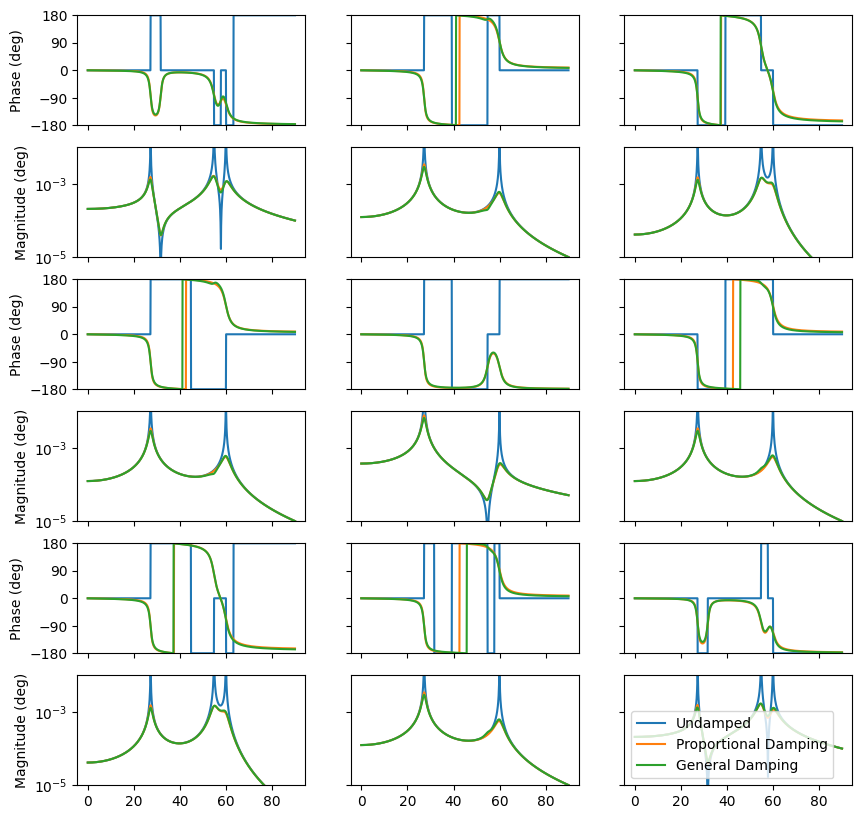

In [17]:
# Get frequency lines
omegas = np.linspace(0,np.max(omega_2ndOrder)*1.5,1000)
# Set up omega for broadcasting the FRF matrix, the first dimension will be frequency line.
# The second two dimensions will be i,j degrees of freedom.
omegas_bc = omegas[:,np.newaxis,np.newaxis]
# Construct Dynamic Stiffness
Z_undamped = M*(1j*omegas_bc)**2 + K
Z_proportional = M*(1j*omegas_bc)**2 + C_proportional*1j*omegas_bc + K
Z_general = M*(1j*omegas_bc)**2 + C_general*1j*omegas_bc + K
# Invert to get frequency response functions
H_undamped = np.linalg.inv(Z_undamped)
H_proportional = np.linalg.inv(Z_proportional)
H_general = np.linalg.inv(Z_general)
# Plot the FRFs
fig,axes = plt.subplots(H_undamped.shape[1]*2,H_undamped.shape[2], sharex=True,sharey='row',figsize=(10,10))
for ax,f_u,f_p,f_g in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                          H_undamped.reshape(omegas.size,-1).T,
                          H_proportional.reshape(omegas.size,-1).T,
                          H_general.reshape(omegas.size,-1).T):
    ax[0].plot(omegas,np.angle(f_u)*180/np.pi)
    ax[0].plot(omegas,np.angle(f_p)*180/np.pi)
    ax[0].plot(omegas,np.angle(f_g)*180/np.pi)
    ax[1].plot(omegas,np.abs(f_u))
    ax[1].plot(omegas,np.abs(f_p))
    ax[1].plot(omegas,np.abs(f_g))
    ax[1].set_yscale('log')
ax[1].legend(['Undamped','Proportional Damping','General Damping'])
for i,ax in enumerate(axes[:,0]):
    if i % 2 == 0:
        ax.set_ylim([-180,180])
        ax.set_yticks([-180,-90,0,90,180])
        ax.set_ylabel('Phase (deg)')
    else:
        ax.set_ylim([1e-5,1e-2])
        ax.set_ylabel('Magnitude (deg)')

Now let's reconstruct the frequency response functions from modal parameters and see if they match those constructed from the dynamic stiffness matrices.

For the second-order case,
$$\mathbf{H} = \sum_{r=1}^N\frac{\mathbf{\phi}_r\mathbf{\phi}_r^T}{-m_r\omega^2 + 2j\zeta_r\omega_r m_r\omega + \omega_r^2m_r}$$

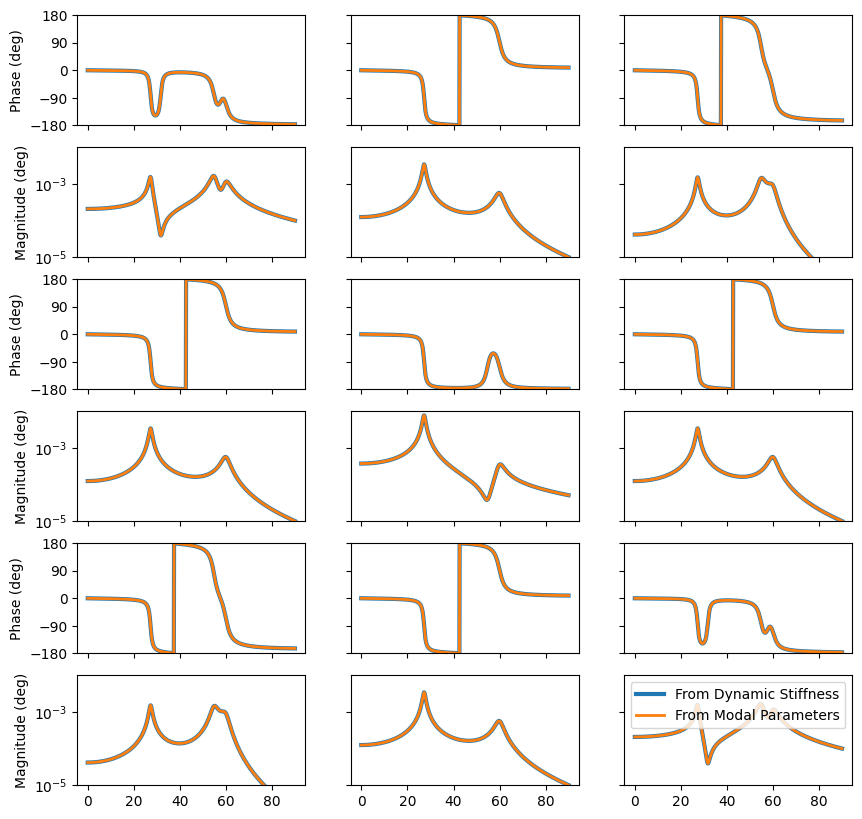

In [18]:
# 2nd Order Case
# First we need to find the modal damping ratios from the damping matrix
zeta_2ndOrder = np.einsum('ji,jk,ki->i',E_2ndOrder,C_proportional,E_2ndOrder)/(2*mm_2ndOrder*omega_2ndOrder)

# Now Construct the FRF matrix from modal parameters
num_modes = omega_2ndOrder.size
H_2ndOrder_fromModes = np.sum([
    phi[:,r,np.newaxis]@phi[:,r,np.newaxis].T/ # The newaxis turns the array from a 1D array back into a 2D array that can be transposed
    (-mm_2ndOrder[r]*omegas_bc**2 + 2j*zeta_2ndOrder[r]*omega_2ndOrder[r]*mm_2ndOrder[r]*omegas_bc + omega_2ndOrder[r]**2*mm_2ndOrder)
    for r in range(num_modes)],axis=0)

# Now plot them
fig,axes = plt.subplots(H_proportional.shape[1]*2,H_proportional.shape[2], sharex=True,sharey='row',figsize=(10,10))
for ax,f_d,f_m in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                      H_proportional.reshape(omegas.size,-1).T,
                      H_2ndOrder_fromModes.reshape(omegas.size,-1).T):
    ax[0].plot(omegas,np.angle(f_d)*180/np.pi,linewidth=3)
    ax[0].plot(omegas,np.angle(f_m)*180/np.pi,linewidth=2)
    ax[1].plot(omegas,np.abs(f_d),linewidth=3)
    ax[1].plot(omegas,np.abs(f_m),linewidth=2)
ax[1].legend(['From Dynamic Stiffness','From Modal Parameters'])
for i,ax in enumerate(axes[:,0]):
    if i % 2 == 0:
        ax.set_ylim([-180,180])
        ax.set_yticks([-180,-90,0,90,180])
        ax.set_ylabel('Phase (deg)')
    else:
        ax.set_ylim([1e-5,1e-2])
        ax.set_ylabel('Magnitude (deg)')
        ax.set_yscale('log')

We see we get identical FRFs.

For the complex mode cases:

$$\mathbf{H} = \sum_{r=1}^N\left( \frac{\mathbf{\psi}_r\mathbf{\psi}_r^T}{m_r(s-\lambda_r)} + \frac{\mathbf{\psi}_r^*{\mathbf{\psi}_r^*}^T}{m_r(s-\lambda_r^*)}\right)$$

Note that for a frequency response function, which assumes a single frequency line excitation, the Laplace variable $s = j\omega$.  The pole $\lambda_r = -\zeta_r\omega_r + j\omega_r\sqrt{1-\zeta_r^2}$.

Here is the proportional damped case:

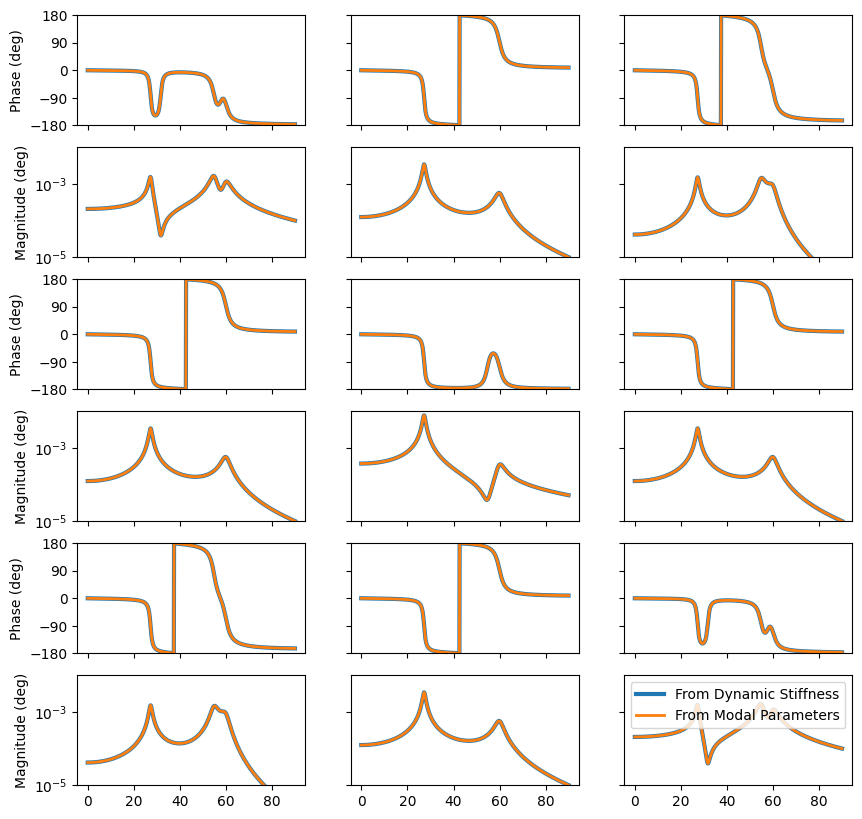

In [19]:
num_modes = omega_proportional.size
# Compute the laplace variables
s=1j*omegas_bc

# Compute FRFs
H_proportional_fromModes = np.sum([
    psi_proportional[:,r,np.newaxis]@psi_proportional[:,r,np.newaxis].T/
    (ma_proportional[r]*(s-
        (-zeta_proportional[r]*omega_proportional[r] + 1j*omega_proportional[r]*np.sqrt(1-zeta_proportional[r]**2))))
    + psi_proportional[:,r,np.newaxis].conj()@psi_proportional[:,r,np.newaxis].T.conj()/
    (ma_proportional[r]*(s-
        (-zeta_proportional[r]*omega_proportional[r] - 1j*omega_proportional[r]*np.sqrt(1-zeta_proportional[r]**2))))
    for r in range(num_modes)],axis=0)

# Now plot them
fig,axes = plt.subplots(H_proportional.shape[1]*2,H_proportional.shape[2], sharex=True,sharey='row',figsize=(10,10))
for ax,f_d,f_m in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                      H_proportional.reshape(omegas.size,-1).T,
                      H_proportional_fromModes.reshape(omegas.size,-1).T):
    ax[0].plot(omegas,np.angle(f_d)*180/np.pi,linewidth=3)
    ax[0].plot(omegas,np.angle(f_m)*180/np.pi,linewidth=2)
    ax[1].plot(omegas,np.abs(f_d),linewidth=3)
    ax[1].plot(omegas,np.abs(f_m),linewidth=2)
ax[1].legend(['From Dynamic Stiffness','From Modal Parameters'])
for i,ax in enumerate(axes[:,0]):
    if i % 2 == 0:
        ax.set_ylim([-180,180])
        ax.set_yticks([-180,-90,0,90,180])
        ax.set_ylabel('Phase (deg)')
    else:
        ax.set_ylim([1e-5,1e-2])
        ax.set_ylabel('Magnitude (deg)')
        ax.set_yscale('log')

And here is the general damped case:

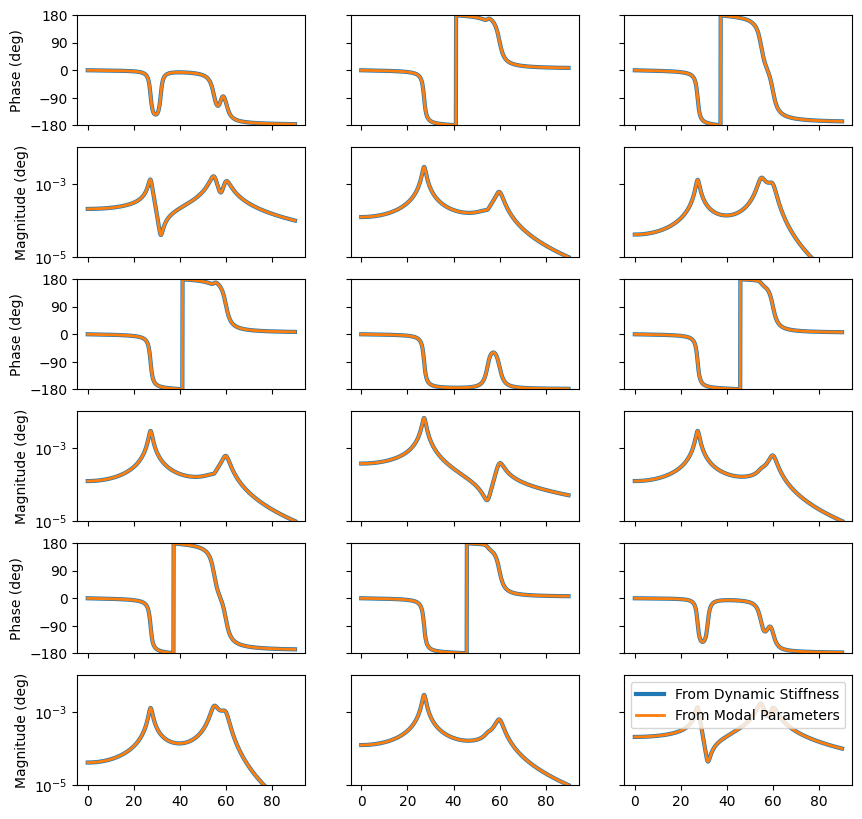

In [20]:
num_modes = omega_general.size
s=1j*omegas_bc

H_general_fromModes = np.sum([
    psi_general[:,r,np.newaxis]@psi_general[:,r,np.newaxis].T/
    (ma_general[r]*(s-
        (-zeta_general[r]*omega_general[r] + 1j*omega_general[r]*np.sqrt(1-zeta_general[r]**2))))
    + psi_general[:,r,np.newaxis].conj()@psi_general[:,r,np.newaxis].T.conj()/
    (ma_general[r]*(s-
        (-zeta_general[r]*omega_general[r] - 1j*omega_general[r]*np.sqrt(1-zeta_general[r]**2))))
    for r in range(num_modes)],axis=0)

# Now plot them
fig,axes = plt.subplots(H_general.shape[1]*2,H_general.shape[2], sharex=True,sharey='row',figsize=(10,10))
for ax,f_d,f_m in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                      H_general.reshape(omegas.size,-1).T,
                      H_general_fromModes.reshape(omegas.size,-1).T):
    ax[0].plot(omegas,np.angle(f_d)*180/np.pi,linewidth=3)
    ax[0].plot(omegas,np.angle(f_m)*180/np.pi,linewidth=2)
    ax[1].plot(omegas,np.abs(f_d),linewidth=3)
    ax[1].plot(omegas,np.abs(f_m),linewidth=2)
ax[1].legend(['From Dynamic Stiffness','From Modal Parameters'])
for i,ax in enumerate(axes[:,0]):
    if i % 2 == 0:
        ax.set_ylim([-180,180])
        ax.set_yticks([-180,-90,0,90,180])
        ax.set_ylabel('Phase (deg)')
    else:
        ax.set_ylim([1e-5,1e-2])
        ax.set_ylabel('Magnitude (deg)')
        ax.set_yscale('log')

We can see that we understand the relationships between the modal parameters and the frequency response functions.

## Solving for Modal Parameters from FRFs
The process of Experimental Modal Analysis involves measuring FRFs and then fitting modal parameters to those FRFs.  Many mode fitting software packages utilize a two-step process.  First, the poles (frequency and damping) are identified, then the shape information is found.  Some curve fitters identify modal participation factors in the first step, which are essentially the mode shapes at the reference degrees of freedom.

This section of the document will follow the implementation of the paper [Peeters, Bart et al. ‘The PolyMAX Frequency-domain Method: a New Standard for Modal Parameter Estimation?’ 1 Jan. 2004 : 395 – 409](https://content.iospress.com/articles/shock-and-vibration/sav00272), which implements the popular PolyMax modal parameter estimator.  This is the algorithm implemented in SDynPy's `PolyPy` fitter.  Other modal parameter estimators may give similar results.

### Setting up the System of Equations

Let us consider the frequency response function that we may measure during a modal test.  We understand that we will only measure a finite bandwidth during the test, therefore there may be contributions to the measured FRFs from modes outside the bandwidth.  We will turn our typical FRF matrix equation

$$\mathbf{H} = \sum_{r=1}^N\left( \frac{\mathbf{\psi}_r\mathbf{\psi}_r^T}{m_r(s-\lambda_r)} + \frac{\mathbf{\psi}_r^*{\mathbf{\psi}_r^*}^T}{m_r(s-\lambda_r^*)}\right)$$

into a "measured" version.  We will replace the value $s$ with $j\omega$.  We will also introduce lower and upper "residuals" ($\mathbf{R}_l$ and $\mathbf{R}_u$, respectively), to try to fit portions of the FRFs from out-of-band modes.  We will explicitly add the notation to show that the frequency response function matrix is a function of frequency $\omega$.  Additionally, we will call the mode shapes of the references the *modal participation factor* $\mathbf{l}_r$ and the mode shapes corresponding to the responses $\mathbf{v}$.  Finally, We will remove the modal mass term, which will make the assumption that the modes we fit from the algorithm will be mass normalized.  Note that the format of the residual terms implies that the frequency response functions we are investigating here are *admittance* frequency response functions, which relate the force at a location to the displacement at a location.

$$\mathbf{H}(\omega) = \sum_{r=1}^N\left( \frac{\mathbf{v}_r\mathbf{l}_r^T}{j\omega-\lambda_r} + \frac{\mathbf{v}_r^*{\mathbf{l}_r^*}^T}{j\omega-\lambda_r^*}\right) + \frac{\mathbf{R}_l}{(j\omega)^2} + \mathbf{R}_u$$

Recall the poles $\lambda_r = -\zeta_r\omega_r + j\omega_r\sqrt{1-\zeta_r^2}$ and $\lambda_r^* = -\zeta_r\omega_r - j\omega_r\sqrt{1-\zeta_r^2}$.

The PolyMax approach assumes that the frequency response function can be represented by a right matrix-fraction model.

$$ \mathbf{H}(\omega) = \mathbf{B}(\omega)\mathbf{A}(\omega)^{-1}$$

Note that these are not the same $\mathbf{A}$ and $\mathbf{B}$ matrices from the previous sections, which represent the state space formulation.  However, this document attempts to match the notation from the referenced paper, so we will override those previous definitions and apologize for any confusion it may cause.

We can see similarities between the two formulations.  The FRF equation has a numerator and a denominator, as well as a summation over a number of modes.  Similarly, the right matrix-fraction model has a matrix that is not inverted (representing something like a numerator), a matrix that is inverted (representing something like a denominator), and a summation operation inherent in the matrix multiplication that is performed.  Terms in $\mathbf{B}$ will relate to the shape information in the numerator of the FRF equation, and terms in $\mathbf{A}$ will relate to the pole information in the denominator of the FRF equation.

The numerator matrix $\mathbf{B}$ will have a number of rows equal to the number of responses or outputs $N_o$ and number of columns equal to the number of references or inputs $N_i$.  The denominator matrix $\mathbf{A}$ will have a number of rows and columns equal to the number of inputs $N_i$, and is therefore square.

We can split up the above equation and look at an individual row of the FRF matrix, which we will denote $\mathbf{H}_o$ to represent a single output.  This will involve selecting a single row from $\mathbf{B}_o$.

$$ \mathbf{H}_o(\omega) = \mathbf{B}_o(\omega)\mathbf{A}(\omega)^{-1}$$

Each entry in the $\mathbf{B}_o$ and $\mathbf{A}$ matrices is represented as a set of coefficients multiplied by a set of basis functions, similar to how we represent displacements in modal analysis by a set of modal coefficients multiplied by a set of mode shapes.  The basis functions $\Omega_r(\omega)$ are a set of functions that depend on the frequency $\omega$.  The coefficients are constant with respect to $\mathbf{\omega}$.  We will call the coefficient of the $\mathbf{B}$ matrix corresponding to the $o$th row and the $r$th basis function $\beta_{or}$.  Similarly, we will call the coefficient of the $\mathbf{A}$ matrix for the $r$th basis function $\alpha_r$.  The number of coefficients and basis functions will be equal to the polynomial order $p+1$.

$$\mathbf{B}_o = \sum_{r=0}^p \Omega_r(\omega)\beta_{or}$$
$$\mathbf{A} = \sum_{r=0}^p \Omega_r(\omega)\alpha_{r}$$

The secret of PolyMax is that instead of using a polynomial basis function for $\Omega_r(\omega)$, it instead transforms to the $z$-domain.  For larger model orders, polynomials will have large exponents, which when applied to large frequency ranges will result in huge differences between the largest and smallest values, which is a sure-fire way to run into numerical issues.  Instead, by using the $z$-domain, the PolyMax approach avoids these numerical issues and generally achieves better results.  For a test where the minimum measured frequency is $\omega_0$ and the maximum measured frequency is $\omega_{end}$, this frequency range is mapped onto a half-unit circle.

$$\Omega_r(\omega) = e^{-j\omega_z \Delta t_z r}$$
where $\omega_z = \omega - \omega_0$ and $\Delta t_z = \frac{\pi}{\omega_{end}-\omega_0}$.  If instead of angular frequencies, the frequency range is represented in Hz with minimum measured frequency $f_0$ and maximum measured frequency $f_{end}$, then the values are instead $\omega_z = 2\pi(f - f_0)$ and $\Delta t_z = \frac{1}{2(f_{end}-f_0)}$ where $f=\frac{\omega}{2\pi}$.

The polynomnial coefficients are stacked into matrices.

$$\beta_o = \begin{bmatrix}\beta_{o0}\\\beta_{o1}\\\beta_{o2}\\\vdots\\\beta_{op}\end{bmatrix}$$

$$\alpha = \begin{bmatrix}\alpha_{0}\\\alpha_{1}\\\alpha_{2}\\\vdots\\\alpha_{p}\end{bmatrix}$$

Here $\beta_o$ has number of rows equal to the polynomial order $p+1$ and number of columns equal to the number of references or inputs $N_i$.  Each row of $\beta_o$ corresponds to the coefficients of one polynomial basis function for all of the references.

$\alpha$ also has a number of columns equal to the number of references or inputs $N_i$.  However, each row partition $\alpha_r$ of $\alpha$ has a number of rows equal to the number of inputs $N_i$ as well.  This means after stacking $p+1$ of these matrices on top of one another, the final number of rows of $\alpha$ is equal to $N_i(p+1)$.

We finally stack all of these coefficients into a single coefficient matrix $\theta$, recalling that there is one matrix $\beta_o$ for each of the $N_o$ outputs of the system.

$$\theta = \begin{bmatrix}\beta_{1}\\\beta_{2}\\\beta_{3}\\\vdots\\\beta_{N_o}\\\alpha\end{bmatrix}$$

Each row partition in $\theta$ has columns equal to the number of inputs $N_i$.  Each of the $\beta_o$ row partions has number of rows equal to the polynomial order $p+1$, and there are $N_o$ of those partitions, resulting in the $\beta$ portion of the $\theta$ matrix having $N_o(p+1)$ rows.  Added to the $N_i(p+1)$ rows of the $\alpha$ partition, the final $\theta$ matrix has $(N_i+N_o)(p+1)$ rows.

At this point, we can represent the FRF matrix as a function of frequency $\omega$ as well as a function of the coefficients $\theta$, $\mathbf{H}(\omega,\theta)$.


### Selecting Coefficients that Minimize Errors
It may be obvious, but the goal is to eventually find the parameters $\theta$ that best fit some measured frequency response functions.  In a real test, we will have measured frequency response functions $\hat{\mathbf{H}}$ at $N_f$ discrete frequency values $\omega_k$.  We would like to find the coefficients $\theta$ that minimize the error between the fit frequency response functions and the measured frequency response functions.  These coefficients can be found by minimizing the weighted non-linear least-squares error for the $o$th output $\varepsilon_o^{NLS}$

$$\varepsilon_o^{NLS}(\omega_k,\theta) = w_o(\omega_k)\left(\mathbf{H}_o(\omega_k,\theta) - \hat{\mathbf{H}}_o(\omega_k)\right)$$
$$\varepsilon_o^{NLS}(\omega_k,\theta) = w_o(\omega_k)\left(\mathbf{B}_o(\omega_k,\beta_o)\mathbf{A}^{-1}(\omega_k,\alpha) - \hat{\mathbf{H}}_o(\omega_k)\right)$$

where $w_o(\omega_k)$ is a weighting function as a function of the output degree of freedom and the frequency line that allows taking into account data quality in the least-squares solution.  The previous equation is a matrix equation, and we would ideally like to transform it into a scalar equation that can be minimized which is only a function of the parameters $\theta$.

$$l^{NLS}(\theta) = \sum_{o=1}^{N_o}\sum_{k=1}^{N_f}\mathrm{tr}\left(\left(\varepsilon_o^{NLS}(\omega_k,\theta)\right)^H\varepsilon_o^{NLS}(\omega_k,\theta)\right)$$

We multiply the value $\varepsilon_o^{NLS}(\omega_k,\theta)$ complex-conjugate-transpose ($\bullet^H$) by itself, and compute the trace ($\mathrm{tr}(\bullet)$).  We then sum over all frequency lines and all outputs.

This equation is solved by setting the derivatives of the equation with respect to the unknown modal coefficients to zero.  It is reasonably clear that this leads to nonlinear equations due to the matrix inverse in the error equation.  We can construct a linear set of equations that approximates the original equations by simply post-multiplying the equation by the matrix $\mathbf{A}$.

$$\varepsilon_o^{LS}(\omega_k,\theta) = w_o(\omega_k)\left(\mathbf{B}_o(\omega_k,\beta_o) - \hat{\mathbf{H}}_o(\omega_k)\mathbf{A}(\omega_k,\alpha)\right)$$
Substituting for the basis functions and coefficients:
$$\varepsilon_o^{LS}(\omega_k,\theta) = w_o(\omega_k)\sum_{r=0}^p\left(
\Omega_r(\omega_k)\beta_{or}
- \Omega_r(\omega_k)\hat{\mathbf{H}}_o(\omega_k)\alpha_r\right)$$

We can stack this equation for all frequency lines ($\omega_1$, $\omega_2$, ... $\omega_{N_f}$)

$$E_o^{LS}(\theta) = \begin{bmatrix}
\varepsilon_o^{LS}(\omega_1,\theta) \\
\varepsilon_o^{LS}(\omega_2,\theta) \\
\vdots \\
\varepsilon_o^{LS}(\omega_{N_f},\theta) \\
\end{bmatrix} = \begin{bmatrix}\mathbf{X}_o & \mathbf{Y}_o \end{bmatrix}\begin{bmatrix}\beta_o\\\alpha\end{bmatrix}$$

This will result in $E_o^{LS}(\theta)$ having a number of rows equal to the number of frequency lines in the test, and the number of columns equal to the number of references or inputs $N_i$.

The $\mathbf{X}_o$ matrix can be constructed from pulling off the coefficients of the $\beta$ terms, which are generally the basis functions $\Omega_r$ evaluated at each frequency line $\omega_k$.  Each row will correspond to a separate frequency line, and each column will correspond to a basis function order.

$$\mathbf{X}_o = \begin{bmatrix}
w_o(\omega_1)\Omega_0(\omega_1) & w_o(\omega_1)\Omega_1(\omega_1) & \cdots & w_o(\omega_1)\Omega_p(\omega_1)\\
w_o(\omega_2)\Omega_0(\omega_2) & w_o(\omega_2)\Omega_1(\omega_2) & \cdots & w_o(\omega_2)\Omega_p(\omega_2)\\
\vdots & \vdots & \ddots & \vdots\\
w_o(\omega_{N_f})\Omega_0(\omega_{N_f}) & w_o(\omega_{N_f})\Omega_1(\omega_{N_f}) & \cdots & w_o(\omega_{N_f})\Omega_p(\omega_{N_f})\\
\end{bmatrix} $$

The $\mathbf{Y}_o$ matrix can be constructed by pulling off the coefficients of the $\alpha$ terms, which are generally the basis functions somehow multiplied by the FRFs.  We will explore this expression a bit more here.  The relevant portion of $\varepsilon_o^{LS}(\omega_k,\theta)$ containing the $\alpha$ terms is 

$$\mathbf{Y}_o \alpha = -\begin{bmatrix}
    \sum_{r=0}^pw_o(\omega_1)\Omega_r(\omega_1)\hat{\mathbf{H}}_o(\omega_1)\alpha_r \\
    \sum_{r=0}^pw_o(\omega_2)\Omega_r(\omega_2)\hat{\mathbf{H}}_o(\omega_2)\alpha_r \\
    \vdots \\
    \sum_{r=0}^pw_o(\omega_{N_f})\Omega_r(\omega_{N_f})\hat{\mathbf{H}}_o(\omega_{N_f})\alpha_r\end{bmatrix}$$

Expanding the equation out in terms of the summation can help visualize which terms go where in the $\mathbf{Y}_o$ matrix.

$$\mathbf{Y}_o \begin{bmatrix}
        \alpha_0 \\
        \alpha_1 \\
        \vdots \\
        \alpha_p
        \end{bmatrix} = -\begin{bmatrix}
    w_o(\omega_1) \left( \Omega_0(\omega_1)\hat{\mathbf{H}}_o(\omega_1)\alpha_0 + \Omega_1(\omega_1)\hat{\mathbf{H}}_o(\omega_1)\alpha_1 + \dots + \Omega_p(\omega_1)\hat{\mathbf{H}}_o(\omega_1)\alpha_p \right) \\
    w_o(\omega_2) \left( \Omega_0(\omega_2)\hat{\mathbf{H}}_o(\omega_2)\alpha_0 + \Omega_1(\omega_2)\hat{\mathbf{H}}_o(\omega_2)\alpha_1 + \dots + \Omega_p(\omega_2)\hat{\mathbf{H}}_o(\omega_2)\alpha_p \right) \\
    \vdots \\
    w_o(\omega_{N_f}) \left( \Omega_0(\omega_{N_f})\hat{\mathbf{H}}_o(\omega_{N_f})\alpha_0 + \Omega_1(\omega_{N_f})\hat{\mathbf{H}}_o(\omega_{N_f})\alpha_1 + \dots + \Omega_p(\omega_{N_f})\hat{\mathbf{H}}_o(\omega_{N_f})\alpha_p \right) \\
    \end{bmatrix}$$
or in matrix form
$$\mathbf{Y}_o \begin{bmatrix}
        \alpha_0 \\
        \alpha_1 \\
        \vdots \\
        \alpha_p
        \end{bmatrix} = -\begin{bmatrix}
    w_o(\omega_1)\Omega_0(\omega_1)\hat{\mathbf{H}}_o(\omega_1) & w_o(\omega_1)\Omega_1(\omega_1)\hat{\mathbf{H}}_o(\omega_1) & \dots & w_o(\omega_1)\Omega_p(\omega_1)\hat{\mathbf{H}}_o(\omega_1) \\
    w_o(\omega_2)\Omega_0(\omega_2)\hat{\mathbf{H}}_o(\omega_2) & w_o(\omega_2)\Omega_1(\omega_2)\hat{\mathbf{H}}_o(\omega_2) & \dots & w_o(\omega_2)\Omega_p(\omega_2)\hat{\mathbf{H}}_o(\omega_2) \\
    \vdots & \vdots & \ddots & \vdots \\ 
    w_o(\omega_{N_f})\Omega_0(\omega_{N_f})\hat{\mathbf{H}}_o(\omega_{N_f}) & w_o(\omega_{N_f})\Omega_1(\omega_{N_f})\hat{\mathbf{H}}_o(\omega_{N_f}) & \dots & w_o(\omega_{N_f})\Omega_p(\omega_{N_f})\hat{\mathbf{H}}_o(\omega_{N_f}) \\
    \end{bmatrix}\begin{bmatrix}
        \alpha_0 \\
        \alpha_1 \\
        \vdots \\
        \alpha_p
        \end{bmatrix}$$

We can recognize the pattern $\begin{bmatrix}\Omega_0\hat{\mathbf{H}}_o & \Omega_1\hat{\mathbf{H}}_o & \dots & \Omega_p\hat{\mathbf{H}}_o\end{bmatrix}$ as the [Kronecker Product](https://en.wikipedia.org/wiki/Kronecker_product) $\mathbf{\Omega} \otimes \hat{\mathbf{H}}_o$ where the matrix $\mathbf{\Omega}$ has only one row.  Therefore, 

$$\mathbf{X}_o = \begin{bmatrix}
w_o(\omega_1)\mathbf{\Omega}(\omega_1)\\
w_o(\omega_2)\mathbf{\Omega}(\omega_2)\\
\vdots \\
w_o(\omega_{N_f})\mathbf{\Omega}(\omega_{N_f})\\
\end{bmatrix} $$
$$\mathbf{Y}_o = -\begin{bmatrix}
    w_o(\omega_1)\mathbf{\Omega}(\omega_1)\otimes\hat{\mathbf{H}}_o(\omega_1)\\
    w_o(\omega_2)\mathbf{\Omega}(\omega_2)\otimes\hat{\mathbf{H}}_o(\omega_2)\\
    \vdots\\ 
    w_o(\omega_{N_f})\mathbf{\Omega}(\omega_{N_f})\otimes\hat{\mathbf{H}}_o(\omega_{N_f})\\
    \end{bmatrix}$$

where $\mathbf{\Omega}(\omega) = \begin{bmatrix}\Omega_0(\omega)&\Omega_1(\omega)&\dots&\Omega_p(\omega)\end{bmatrix}$

Similarly to the nonlinear least squares solution, we can construct an error cost function to minimize based on the linearized equation.

$$l^{LS}(\theta) = \sum_{o=1}^{N_o}\sum_{k=1}^{N_f}\mathrm{tr}\left(\left(\varepsilon_o^{LS}(\omega_k,\theta)\right)^H\varepsilon_o^{LS}(\omega_k,\theta)\right)$$

or 

$$l^{LS}(\theta) = \sum_{o=1}^{N_o}\mathrm{tr}\left(\left(E_o^{LS}(\omega_k,\theta)\right)^HE_o^{LS}(\omega_k,\theta)\right)$$

If we substitute the matrix equations, we get

$$l^{LS}(\theta) = \sum_{o=1}^{N_o}\mathrm{tr}\left(
\begin{bmatrix}\beta_o^T & \alpha^T\end{bmatrix}\begin{bmatrix}\mathbf{X}_o^H \\ \mathbf{Y}_o^H\end{bmatrix}\begin{bmatrix}\mathbf{X}_o & \mathbf{Y}_o\end{bmatrix}\begin{bmatrix}\beta_o \\ \alpha\end{bmatrix}\right)$$

Ideally, we would like to remove the summation in the previous equation and end up with an equation of the form $l^{LS}(\theta) = \mathrm{tr}\left(\mathbf{\theta}^T\mathbf{J}^H\mathbf{J}\mathbf{\theta}\right)$.  We recognize that we can stack the equations for $E_o^{LS}$ for all outputs and arrive at an equation

$$\begin{bmatrix}E_1^{LS} \\ E_2^{LS} \\ \vdots \\ E_{N_o}^{LS} \end{bmatrix} = 
\begin{bmatrix}
    \begin{bmatrix}\mathbf{X}_1 & \mathbf{Y}_1\end{bmatrix}\begin{bmatrix}\beta_1 \\ \alpha\end{bmatrix} \\ 
    \begin{bmatrix}\mathbf{X}_2 & \mathbf{Y}_2\end{bmatrix}\begin{bmatrix}\beta_2 \\ \alpha\end{bmatrix} \\
    \vdots \\
    \begin{bmatrix}\mathbf{X}_{N_o} & \mathbf{Y}_{N_o}\end{bmatrix}\begin{bmatrix}\beta_{N_o} \\ \alpha\end{bmatrix}\end{bmatrix} = 
\begin{bmatrix}\mathbf{X}_1 & \mathbf{0} & \dots & \mathbf{0} & \mathbf{Y}_1 \\
               \mathbf{0} & \mathbf{X}_2 & \dots & \mathbf{0} & \mathbf{Y}_2 \\
               \vdots & \vdots & \ddots & \vdots & \vdots \\
               \mathbf{0} & \mathbf{0} & \dots & \mathbf{X}_{N_o} & \mathbf{Y}_{N_o} \end{bmatrix}\begin{bmatrix}\beta_{1}\\\beta_{2}\\\vdots\\\beta_{N_o}\\\alpha\end{bmatrix}$$

where

$$\mathbf{J} = \begin{bmatrix}\mathbf{X}_1 & \mathbf{0} & \dots & \mathbf{0} & \mathbf{Y}_1 \\
               \mathbf{0} & \mathbf{X}_2 & \dots & \mathbf{0} & \mathbf{Y}_2 \\
               \vdots & \vdots & \ddots & \vdots & \vdots \\
               \mathbf{0} & \mathbf{0} & \dots & \mathbf{X}_{N_o} & \mathbf{Y}_{N_o} \end{bmatrix}$$
and as we've seen previously,
$$\mathbf{\theta} = \begin{bmatrix}\beta_{1}\\\beta_{2}\\\vdots\\\beta_{N_o}\\\alpha\end{bmatrix}$$

Therefore our cost function can be simplified to

$$l^{LS}(\theta) = \mathrm{tr}\left(\mathbf{\theta}^T\mathbf{J}^H\mathbf{J}\mathbf{\theta}\right)$$

In general, the quantity $\mathbf{J}^H\mathbf{J}$ will be conjugate-symmetric or [Hermitian](https://en.wikipedia.org/wiki/Hermitian_matrix).  This means that its upper triangle will be equal to the complex conjugate of the lower triangle transposed, and the diagonal will be real valued.  While the matrix $\mathbf{J}^H\mathbf{J}$ is therefore complex, in the previous equation, because it multiplies by real valued coefficients $\mathbf{\theta}$ and we take the trace, which should only select the real-valued diagonal, we can replace the quantity $\mathbf{J}^H\mathbf{J}$ with its real part $\Re\left(\mathbf{J}^H\mathbf{J}\right)$

Computing $\Re\left(\mathbf{J}^H\mathbf{J}\right)$ gives

$$\Re\left(\mathbf{J}^H\mathbf{J}\right) = \begin{bmatrix}\mathbf{R}_1 & \mathbf{0} & \dots & \mathbf{0} & \mathbf{S}_1 \\
                                                          \mathbf{0} & \mathbf{R}_2 & \dots & \mathbf{0} & \mathbf{S}_2 \\
                                                          \vdots & \vdots & \ddots & \vdots & \vdots \\
                                                          \mathbf{0} & \mathbf{0} & \dots & \mathbf{R}_{N_o} & \mathbf{S}_{N_o} \\
                                                          \mathbf{S}_1^T & \mathbf{S}_2^T & \dots & \mathbf{S}_{N_o} & \sum_{o=1}^{N_o}T_o
                                                          \end{bmatrix} $$
where
$$\mathbf{R}_o = \Re\left(\mathbf{X}_o^H\mathbf{X}_o\right)$$
$$\mathbf{S}_o = \Re\left(\mathbf{X}_o^H\mathbf{Y}_o\right)$$
$$\mathbf{T}_o = \Re\left(\mathbf{Y}_o^H\mathbf{Y}_o\right)$$

We minimize the cost function by setting the derivatives of the cost function with respect to the coefficients $\mathbf{\theta}$ to zero.

$$l^{LS}(\theta) = \mathrm{tr}\left(\begin{bmatrix}\beta_{1}\\\beta_{2}\\\vdots\\\beta_{N_o}\\\alpha\end{bmatrix}^T\begin{bmatrix}\mathbf{R}_1 & \mathbf{0} & \dots & \mathbf{0} & \mathbf{S}_1 \\
                                                          \mathbf{0} & \mathbf{R}_2 & \dots & \mathbf{0} & \mathbf{S}_2 \\
                                                          \vdots & \vdots & \ddots & \vdots & \vdots \\
                                                          \mathbf{0} & \mathbf{0} & \dots & \mathbf{R}_{N_o} & \mathbf{S}_{N_o} \\
                                                          \mathbf{S}_1^T & \mathbf{S}_2^T & \dots & \mathbf{S}_{N_o} & \sum_{o=1}^{N_o}T_o
                                                          \end{bmatrix}\begin{bmatrix}\beta_{1}\\\beta_{2}\\\vdots\\\beta_{N_o}\\\alpha\end{bmatrix}\right)$$
Expanding the multiplication gives
$$l^{LS}(\theta) = \mathrm{tr}\left(
    \sum_{o=1}^{N_o}\left(\beta_o^T\mathbf{R}_o\beta_o\right) + 
    \sum_{o=1}^{N_o}\left(\alpha^T\mathbf{S}_o^T\beta_o\right) + 
    \sum_{o=1}^{N_o}\left(\beta_o^T\mathbf{S}_o\alpha\right) + 
    \sum_{o=1}^{N_o}\left(\alpha^T\mathbf{T}_o\alpha\right)\right)$$
$$l^{LS}(\theta) = \mathrm{tr}\sum_{o=1}^{N_o}\left(
    \beta_o^T\mathbf{R}_o\beta_o + 
    \alpha^T\mathbf{S}_o^T\beta_o + 
    \beta_o^T\mathbf{S}_o\alpha + 
    \alpha^T\mathbf{T}_o\alpha\right)$$

We can therefore compute the partial derivatives with respect to the unknown coefficients and set them to zero.
$$\frac{\partial l^{LS}(\theta)}{\partial \beta_o} = 
    2\mathbf{R}_o\beta_o + 
    2\mathbf{S}_o\alpha = \mathbf{0}$$
$$\frac{\partial l^{LS}(\theta)}{\partial \alpha} = 
    \sum_{o=1}^{N_o}\left( 
    2\mathbf{S}_o^T\beta_o + 
    2\mathbf{T}_o\alpha\right) =\mathbf{0}$$

As a first pass, we only care about the poles, which come from the denominator terms $\alpha$.  We can eliminate the $\beta_o$ terms using the first of these constraints
$$\beta_o = -\mathbf{R}_o^{-1}\mathbf{S}_o\alpha$$

We can then plug this into the second constraint to get an equation for $\mathbf{\alpha}$.

$$\left[2\sum_{o=1}^{N_o}\left( 
    \mathbf{T}_o - \mathbf{S}_o^T\mathbf{R}_o^{-1}\mathbf{S}_o\right)\right]\alpha= \mathbf{M}\alpha= \mathbf{0}$$

This matrix $\mathbf{M}$ is a square matrix with number of rows and columns equal to the number of inputs times the polynomial order $N_i(p+1) \times N_i(p+1)$, and depends only on the measured FRFs from the test.  Note, however, that this equation is not unique.  For example, the trival solution $\alpha = \mathbf{0}$ satisfies this equation.  Additionally, one may see that in the right matrix-fraction formulation $ \mathbf{H}(\omega) = \mathbf{B}(\omega)\mathbf{A}(\omega)^{-1}$, one could multiply both $\mathbf{A}$ and $\mathbf{B}$ by the same matrix, and the equation would still be satisfied.  Therefore, there is not a unique value for $\alpha$.

### Solving the Constrained Problem
To solve a problem of the form $\mathbf{A}\mathbf{x} = \mathbf{0}$ for the non-trivial $\mathbf{x}$, we must apply some constraint to the problem.

To solve the problem, we will partition the matrix $\mathbf{M}$ as follows

$$\mathbf{M} = \begin{bmatrix}\mathbf{M}_{aa} & \mathbf{M}_{ab} \\ 
                              \mathbf{M}_{ba} & \mathbf{M}_{bb}\end{bmatrix}$$

where the $a$ indices are the first $N_ip$ rows or columns and the $b$ indices are the last $p$ columns, recalling the size of $\mathbf{M}$ is $N_i(p+1)$.  Therefore the matrix $\mathbf{M}_{aa}$ matrix will have size $N_ip\times N_ip$, the $\mathbf{M}_{ab}$ matrix will have size $N_ip\times p$, the $\mathbf{M}_{ba}$ matrix will have size $p\times N_ip$, and the $\mathbf{M}_{bb}$ matrix will have size $p\times p$.

Because we must apply constraints to our problem, we will make the assumption that our solution matrix $\mathbf{\alpha}$ will have the form

$$\mathbf{\alpha} = \begin{bmatrix}\hat{\mathbf{\alpha}}  \\ 
                                   \mathbf{I}\end{bmatrix}$$

We can see that if we plug this version of $\mathbf{\alpha}$ into the equation, we get an expression for the portion of $\mathbf{\alpha}$ that was not constrained.

$$\begin{bmatrix}\mathbf{M}_{aa} & \mathbf{M}_{ab} \\ 
                 \mathbf{M}_{ba} & \mathbf{M}_{bb}\end{bmatrix}
  \begin{bmatrix}\hat{\mathbf{\alpha}}  \\ 
                 \mathbf{I}\end{bmatrix} =
  \begin{bmatrix}\mathbf{M}_{aa}\hat{\alpha} + \mathbf{M}_{ab}\\
                 \mathbf{M}_{ba}\hat{\alpha} + \mathbf{M}_{bb}\end{bmatrix} = 
   \begin{bmatrix}\mathbf{0} \\
                  \mathbf{0}\end{bmatrix}$$

We can then simply take the top partition to solve for $\hat{\alpha}$.

$$\hat{\alpha} = -\mathbf{M}_{aa}^{-1}\mathbf{M}_{ab}$$

### Extracting Poles and Participation Factors
Now that we have the polynomial coefficients $\mathbf{\alpha}$ for the right matrix-fraction model, we would like to extract the roots from it.  The roots of this polynomial are the poles of the frequency response function.  We will do this by setting up a [Companion Matrix](https://en.wikipedia.org/wiki/Companion_matrix).  A Companion matrix of a polynomial is a matrix whose characteristic equation is equal to that polynomial.  Then the eigenvalues of the matrix (which are the roots of the characteristic equation) are also the roots of the polynomial.  In our case, the eigenvectors are also useful, as they are related to the participation factors.

For a polynomial $p(x) = \alpha_p x^p + \alpha_{p-1} x^{p-1} + \dots + \alpha_2 x^2 + \alpha_1 x + \alpha_0$, the companion matrix will be 

$$ \mathbf{C} = \begin{bmatrix} 0 & 1 & 0 & \dots & 0\\
                                0 & 0 & 1 & \dots & 0\\
                                \vdots & \vdots & \vdots & \ddots & \vdots\\
                                0 & 0 & 0 & \dots & 1\\
                                -\frac{\alpha_0}{\alpha_p} & -\frac{\alpha_1}{\alpha_p} & -\frac{\alpha_2}{\alpha_p} & \dots & -\frac{\alpha_{p-1}}{\alpha_p} 
                                \end{bmatrix}$$

Readers can verify that $\mathrm{det}(\mathbf{I}x - \mathbf{C}) = p(x)$.

Our present case is slightly different, because our coefficients are matrices rather than scalars.

$$ \mathbf{C} = \begin{bmatrix} \mathbf{0} & \mathbf{I} & \mathbf{0} & \dots & \mathbf{0}\\
                                \mathbf{0} & \mathbf{0} & \mathbf{I} & \dots & \mathbf{0}\\
                                \vdots & \vdots & \vdots & \ddots & \vdots\\
                                \mathbf{0} & \mathbf{0} & \mathbf{0} & \dots & \mathbf{I}\\
                                -\alpha_0^T{\alpha_p^T}^{-1} & -\alpha_1^T{\alpha_p^T}^{-1} & -\alpha_2^T{\alpha_p^T}^{-1} & \dots & -\alpha_{p-1}^T{\alpha_p^T}^{-1}
                                \end{bmatrix}$$
However, because we applied the constraint such that $\alpha_p = \mathbf{I}$ when solving for $\mathbf{\alpha}$, the quantity $\alpha_p^{-1} = \mathbf{I}$, and the remaining terms are those in $\hat{\mathbf{\alpha}}$.

$$ \mathbf{C} = \begin{bmatrix} \mathbf{0} & \mathbf{I} & \mathbf{0} & \dots & \mathbf{0}\\
                                \mathbf{0} & \mathbf{0} & \mathbf{I} & \dots & \mathbf{0}\\
                                \vdots & \vdots & \vdots & \ddots & \vdots\\
                                \mathbf{0} & \mathbf{0} & \mathbf{0} & \dots & \mathbf{I}\\
                                -\hat{\alpha_0}^T & -\hat{\alpha_1}^T & -\hat{\alpha_2}^T & \dots & -\hat{\alpha}_{p-1}^T
                                \end{bmatrix}$$

The $\mathbf{C}$ matrix will be a square matrix with size $N_ip \times N_ip$ where $N_i$ is the number of inputs or references, and $p$ is the order of the polynomial.

We can therefore notate the companion matrix compactly as
$$\mathbf{C} = \begin{bmatrix} \begin{matrix}\mathbf{0} & \mathbf{I}\end{matrix} \\ \begin{matrix}-\hat{\alpha}^T\end{matrix}\end{bmatrix}$$

We can then solve for the eigenvalues and eigenvectors of this matrix.  The companion matrix is set up such that its characteristic polynomial is identical to the polynomial it represents.  Therefore, its eigenvalues, which are roots of the characteristic polynomial, will be roots of the polynomial it represents.

$$\mathbf{C}\mathbf{V} = \begin{bmatrix} \mathbf{0} & \mathbf{I} & \mathbf{0} & \dots & \mathbf{0}\\
                                \mathbf{0} & \mathbf{0} & \mathbf{I} & \dots & \mathbf{0}\\
                                \vdots & \vdots & \vdots & \ddots & \vdots\\
                                \mathbf{0} & \mathbf{0} & \mathbf{0} & \dots & \mathbf{I}\\
                                -\hat{\alpha_0}^T & -\hat{\alpha_1}^T & -\hat{\alpha_2}^T & \dots & -\hat{\alpha}_{p-1}^T
                                \end{bmatrix}\mathbf{V}= \mathbf{\Lambda}\mathbf{V}$$
The diagonals of the eigenvector matrix $\bar{\lambda}_r = \mathbf{\Lambda}_{rr}$ are the eigenvalues of the companion matrix.  These are the poles of the system; however, we must remember they are represented in the $z$-domain, so we must return to the $s$-domain $\lambda_r$ in order to solve for the natural frequency and damping ratio.

$$\bar{\lambda}_r = e^{-\lambda_r \Delta t_z}$$
$$\lambda_r = -\frac{\log{\lambda_r}}{\Delta t_z}$$

where $\Delta t_z = \frac{\pi}{\omega_{end}-\omega_0}$.

We can then solve for the natural frequency and damping ratio from the poles.  Recall that the frequency was shifted by $\omega_0$ during the mapping, so we will need to take that into account.

$${\omega_z}_r = \left|\lambda_r\right|$$
$${\omega_r} = {\omega_z}_r + \omega_0$$
$$\zeta_r = -\frac{\Re\left({\lambda_r}\right)}{\omega_r}$$

Note that there will be in general $N_ip$ eigenvalues.  Half of them will be complex conjugates of the other half, so we can ignore those.  Similarly, we can ignore non-physical eigenvalues.  A criteria that is successfully used is to only keep poles where the real part is less than zero and the imaginary part is greater than zero.

The modal participation factors $\mathbf{l}_r$ can be determined from the eigenvectors of the companion matrix.  They will be the last $N_i$ rows of the eigenvector matrix.  One must also be sure that for each eigenvalue discarded for being non-physical or complex conjugate, the corresponding eigenvector should also be discarded.

### Stabilization Diagrams
Solving for a polynomial of a particular order will in general result in a large number of poles.  For a typical problem, only a subset of these poles will correspond to true modes of the structure.  For a typical modal test, it may not be obvious how many modes are in a given bandwidth anyways.  Therefore, we need some kind of metric to determine if a pole is valid or not, and for this we utilize the stabilization diagram.

A stabilization diagram is constructed by computing the poles over a large number of polynomial orders.  As we increase the polynomial orders, more poles may be found in the system.  We declare a *stable pole* to be one which does not change significantly as the polynomial order changes.  Computational poles may bounce around the measurement bandwidth.  Real poles of the system, on the other hand, will generally result in a similar frequency, damping ratio, and set of participation factors regardless of the polynomial order.  We then construct a final set of poles by selecting from the stable poles in the stabilization diagram.

### Back to the Example Problem
To demonstrate the equations shown here, we will implement the previous equations in code.  We will demonstrate solution of one polynomial order to demonstrate the process, and then rely on the implementation in SDynPy to perform the rest of the analysis.  We will initially focus only on the general damping case rather than repeating the analysis for all the damping matrices.

To start, we will pull in the measured frequency response functions and corresponding frequency values.  We will shape the frequency response function such that it is a 3D array with shape $N_o \times N_i \times N_f$.  We will also assume that we only peformed measurements with inputs at the first and second degrees of freedom.

In [21]:
H = H_general.transpose(1,2,0)[:,:2,:]

In [22]:
H.shape

(3, 2, 1000)

We will also assume that we only performed measurements over a limited bandwidth from 10 rad/s to 80 rad/s.

In [23]:
frequency_lines_to_keep = (omegas > 10) & (omegas < 80)
H = H[:,:,frequency_lines_to_keep]
omegas = omegas[frequency_lines_to_keep]

Now that we have truncated the frequency domain, we will define some helper variables to make the code a bit more intuitive.

In [24]:
num_output, num_input, num_freq = H.shape
print('Num Outputs: {:}\nNum Inputs: {:}\nNum Frequencies: {:}'.format(num_output, num_input, num_freq))

Num Outputs: 3
Num Inputs: 2
Num Frequencies: 778


We will also set our polynomial order.  In this case, we know that there are 3 modes of the structure in the bandwidth.  However, let's select 5 as the polynomial order, as we generally would like to overfit the model.  Keep in mind that this will result in 6 polynomial coefficients: 0, 1, 2, 3, 4, and 5.  Therefore, you shouldn't be confused when dimensions of arrays associated with the polynomial order have length 6 instead of length 5.

In [25]:
order = 5

We will assume no weighting, or rather the weighting is identically 1 across all outputs and across all frequencies.

In [26]:
weighting = np.ones((num_freq,num_output))

The first thing we will do is to set up our $\mathbf{\Omega}_r(\omega) = e^{-j\omega_z\Delta t_z r}$ vectors.  We will set this up as an array with number of rows equal to number of frequency lines and number of columns equal to the number of polynomial coefficients.

In [27]:
omega_z = omegas - omegas[0] # Perform the shift
deltat = np.pi/(omegas[-1] - omegas[0]) # Compute the scale factor
Omega = np.exp(-1j * omega_z[:,np.newaxis] * deltat * np.arange(order+1)) # Compute Omega
Omega.shape

(778, 6)

In the previous code, we use broadcasting to set up our $\mathbf{\Omega}_r$ array.  We add a `newaxis` to our shifted frequency vector $\omega_z$ to make it a `num_freq` $\times$ 1 array.  This is then multiplied by an array `[0,1,2,3,4,5]` constructed from the `arange` function.  Per [Numpy's Broadcasting Rules](https://numpy.org/doc/stable/user/basics.broadcasting.html), a `num_freq` $\times$ 1 array and a `order+1` array will be broadcast to a `num_freq` $\times$ `order+1` array.  Multiplying by scalars `deltat` and `-1j` get performed elementwise, as does the exponential function `exp`.

The next step will be to assemble the $\mathbf{R}_o$, $\mathbf{S}_o$, and $\mathbf{T}_o$ matrices.  These are built from the $\mathbf{X}_o$ and $\mathbf{Y}_o$ matrices.

Before we do this let's think about the dimensions of the arrays.  The matrix $\mathbf{R}_o$ for each output will have dimension `order+1` $\times$ `order+1`.  The matrix $\mathbf{S}_o$ for each output will have dimension `order + 1` $\times$ `num_input*(order+1)`.  The $\mathbf{T}_o$ matrix for each output will have dimension `num_input*(order+1)` $\times$ `num_input*(order+1)`.  Because we will have `num_output` of each of these matrices, we will consider assembling them into a 3D array with dimension `num_output` $\times$ `...` $\times$ `...` .

In [28]:
R = np.zeros([num_output, order + 1, order + 1])
S = np.zeros([num_output,order + 1, num_input * (order + 1)])
T = np.zeros([num_output, num_input * (order + 1), num_input * (order + 1)])
print('Shapes:\n  R: {:}\n  S: {:}\n  T: {:}'.format(R.shape,S.shape,T.shape))

Shapes:
  R: (3, 6, 6)
  S: (3, 6, 12)
  T: (3, 12, 12)


We will then loop through each of the outputs and assemble the corresponding portions of the matrices.

In [29]:
for o in range(num_output):
    print('Accumulating Data: Progress = {:0.2f}%'.format(o / num_output * 100.0))
    # The Xo matrix depends only on the weighting and Omega.  We use
    # broadcasting to extend the weighting across all polynomial coefficients
    Xo = weighting[:, o][..., np.newaxis] * Omega
    # The Yo matrix will need the measured frequency response functions
    # at the output o.
    Ho = H[o, ...]
    # We note that rather than re-multiplying the weighting by Omega in the
    # Yo matrix, we can simply use Xo.  Here we must loop over all frequency
    # lines to perform the kronecker product.  The frequency lines are the
    # rows of X, and the columns of Ho, so we transpose Ho.
    # Xk is then the polynomial coefficients at the k frequency line and
    # Hk is the FRF for each input at that frequency line.
    Yo = np.array([-np.kron(Xk, Hk) for Xk, Hk in zip(Xo, Ho.transpose())])
    # We then construct the R, S, and T matrices for that output from their
    # definitions
    Ro = np.real(Xo.conjugate().transpose() @ Xo)
    So = np.real(Xo.conjugate().transpose() @ Yo)
    To = np.real(Yo.conjugate().transpose() @ Yo)
    # We stick the matrices into the 3D arrays for future usage.
    R[o, :, :] = Ro
    S[o, :, :] = So
    T[o, :, :] = To
print('Accumulating Data: Progress = {:0.2f}%'.format((o+1) / num_output * 100.0))
print('Shapes:\n  Xo: {:}\n  Yo: {:}\n  Ro: {:}\n  So: {:}\n  To: {:}'.format(
    Xo.shape,Yo.shape,Ro.shape,So.shape,To.shape))

Accumulating Data: Progress = 0.00%
Accumulating Data: Progress = 33.33%
Accumulating Data: Progress = 66.67%
Accumulating Data: Progress = 100.00%
Shapes:
  Xo: (778, 6)
  Yo: (778, 12)
  Ro: (6, 6)
  So: (6, 12)
  To: (12, 12)


We will now compute the $\mathbf{M}$ matrix, which is equal to $\sum_{o=1}^{N_o}\left(\mathbf{T}_o - \mathbf{S}_o^T\mathbf{R}_o^{-1}\mathbf{S}_o\right)$.  Note that we dropped the factor of 2 in front of the expression because the final answer $\alpha$ is only defined up to a matrix product.  Multiplying the answer by 2 will not result in any meaningful change.

We will compute the contribution $\mathbf{M}_o = \mathbf{T}_o - \mathbf{S}_o^T\mathbf{R}_o^{-1}\mathbf{S}_o$ for each output and then sum them together to construct $\mathbf{M}$.

In [30]:
# Because S is a 3D array, to transpose it, we will only want to
# swap the last two dimensions and leave the first output dimension
# out front.
# We compute R^-1 using np.linalg.solve, which solves a problem.
# np.linalg.solve(R,S) is equivalent to R^-1@S, but is faster and
# better conditioned.
M = np.sum(T - S.transpose(0,2,1) @ np.linalg.solve(R, S),axis=0)
print('Shapes:\n  M: {:}'.format(M.shape))

Shapes:
  M: (12, 12)


Now we will solve for the parameters $\mathbf{\alpha}$ and construct the companion matrix.  Recall that in our solution we will assume $\mathbf{\alpha}_p$ is equal to the identity matrix and drops out of the companion matrix computation, so we really only need to compute $\hat{\alpha} = -\mathbf{M}_{aa}^{-1}\mathbf{M}_{ab}$.

In [31]:
Maa = M[:order * num_input, :order * num_input]
Mbb = -M[:order * num_input, order * num_input:]
alpha = np.linalg.solve(Maa, Mbb)
print('Shapes:\n  Maa: {:}\n  Mbb: {:}\n  alpha: {:}'.format(
    Maa.shape,Mbb.shape,alpha.shape))

Shapes:
  Maa: (10, 10)
  Mbb: (10, 2)
  alpha: (10, 2)


We will then construct the companion matrix $\mathbf{C} = \begin{bmatrix} \begin{matrix}\mathbf{0} & \mathbf{1}\end{matrix} \\ \begin{matrix}-\hat{\alpha}^T\end{matrix}\end{bmatrix}$.  The partition $\mathbf{0}$ will have shape `(order-1)*num_input` $\times$ `num_input`, and the partition $\mathbf{I}$ will have shape `(order-1)*num_input` $\times$ `(order-1)*num_input`.

In [32]:
C_top_left = np.zeros([(order - 1) * num_input, num_input])
C_top_right = np.eye((order - 1) * num_input)
C_bottom = -alpha.transpose()
C = np.concatenate(
    (np.concatenate((C_top_left, C_top_right), axis=1),
     C_bottom), axis=0)
print('Shapes:\n  C: {:}'.format(
    C.shape))

Shapes:
  C: (10, 10)


Finally, we can compute the eigenvalues and eigenvectors from this matrix, which should be the solutions to the polynomial.  Remember that the eigenvalues will be in the $z$-domain, and must be transformed back to the $s$ domain for us to extract natural frequency and damping ratio: $\lambda_r = -\frac{\log{\lambda_r}}{\Delta t_z}$.

In [33]:
zpoles, V = np.linalg.eig(C)
spoles = -np.log(zpoles)/deltat

We will immediately discard any poles where the imaginary part is less than zero or the real part is greater than zero, ensuring that we also discard the corresponding eigenvectors.

In [34]:
keep_poles = (np.imag(spoles) > 0) & (np.real(spoles) < 0)
spoles = spoles[keep_poles]
V = V[:,keep_poles]

We can then extract the (shifted) natural frequency and damping ratios from the poles.  We unshift the natural frequency from the pole to recover the natural frequency of the structure.

In [35]:
omega_general_fit = abs(spoles) + omegas[0]
zeta_general_fit = -np.real(spoles)/omega_general_fit

The modal participation factors $\mathbf{l}_r$ are then the last `num_input` rows of the eigenvectors.

In [36]:
lr = V[-num_input:]

Let's compare the fit natural frequencies to those from the test problem.  We will sort them ascending so they match those computed directly from the eigenvalues of the state space formulation.  Make sure that we also sort the damping and participation factors identically.

In [37]:
sort_indices = np.argsort(omega_general_fit)
omega_general_fit = omega_general_fit[sort_indices]
zeta_general_fit = zeta_general_fit[sort_indices]
lr = lr[:,sort_indices]

Let's now set up a table to show the differences.  We will compare the participation factors against the same degrees of freedom from the corresponding mode shapes.  Note that the participation factors may be scaled differently and rotated differently than the mode shapes, so we must rescale and rotate them to judge how well they fit.

In [38]:
df = pd.DataFrame(columns = ['Frequency From System Matrices','Frequency From FRF Fits','Frequency Error',
                             'Damping From System Matrices','Damping From FRF Fits','Damping Error',
                             'Participation From System Matrices','Participation From FRF Fits'],
                  dtype=object)
for i,(wm,wf,zm,zf,lm,lf) in enumerate(zip(
    omega_general,omega_general_fit,
    zeta_general, zeta_general_fit,
    psi_general[:2,:].T, lr.T)):
    df.at[i,'Frequency From System Matrices'] = '{:0.2f}'.format(wm)
    df.at[i,'Frequency From FRF Fits'] = '{:0.2f}'.format(wf)
    df.at[i,'Frequency Error'] = '{:0.2f}%'.format((wf-wm)/wm*100)
    df.at[i,'Damping From System Matrices'] = '{:0.2f}%'.format(zm*100)
    df.at[i,'Damping From FRF Fits'] = '{:0.2f}%'.format(zf*100)
    df.at[i,'Damping Error'] = '{:0.2f}%'.format((zf-zm)/zm*100)
    # Find the maximum participation degree of freedom from the
    # system matrices
    check_index = np.argmax(np.abs(lm))
    # Compute the angle of that index
    check_angle = np.angle(lm[check_index])
    # Compute the same angle from the fit
    this_angle = np.angle(lf[check_index])
    rotation = check_angle - this_angle
    # Compute the magnitudes of the vectors
    check_magnitude = np.linalg.norm(np.abs(lm))
    this_magnitude = np.linalg.norm(np.abs(lf))
    # Correct rotation and scaling
    lf = lf*np.exp(1j*rotation)*check_magnitude/this_magnitude
    df.at[i,'Participation From System Matrices'] = str(lm)
    df.at[i,'Participation From FRF Fits'] = str(lf)
    
pretty_print_table(df)

,Frequency From System Matrices,Frequency From FRF Fits,Frequency Error,Damping From System Matrices,Damping From FRF Fits,Damping Error,Participation From System Matrices,Participation From FRF Fits
0,27.25,27.30,0.19%,2.71%,2.60%,-3.90%,[-0.04320045+0.04405838j -0.09857882+0.09838338j],[-0.04318693+0.04408044j -0.09857685+0.09838141j]
1,54.78,54.86,0.15%,2.74%,2.76%,0.67%,[0.06535574-0.06999465j 0.00185538+0.00185558j],[0.06534612-0.06998435j 0.00118367+0.00286075j]
2,59.91,59.88,-0.06%,2.66%,2.69%,1.02%,[-0.06059005+0.05448316j 0.03373321-0.03429903j],[-0.06070207+0.05458388j 0.03320861-0.0344524j ]


We can verify that we get very good agreement between the quantities derived from the system matrices and those fit by the FRFs.  However, we may have simply been lucky: our system of equations actually solved for `order*num_inputs` or 10 poles, and it just so happened that 3 of them ended up being physically realizable with positive damping and frequency.  It is possible that more of them would have been physically realizable, in which case we would have had to go through and try to figure out which poles are "real" and which are "computational", and without *a priori* knowledge of the true pole information, it could be very difficult to do this.

Instead, we use a stabilization diagram.  We solve for a range of different polynomial orders and we plot the resulting frequencies on a figure.  We then identify poles that appear in many different model orders to be "stable" and we accept these as real poles.

Rather than code all this from scratch, we will simply rely on SDynPy's `PolyPy` implementation to help us out.  `PolyPy` relies on the FRF being structured as a `TransferFunctionArray`, so we must first create one from our data.  Note that `PolyPy` works with frequencies in Hz rather than in radians per second, so we must convert our `omegas` variable by dividing by $2\pi$.

In [39]:
import sdynpy as sdpy
tfarray = sdpy.data_array(sdpy.data.FunctionTypes.FREQUENCY_RESPONSE_FUNCTION,
                          abscissa = omegas/(2*np.pi), ordinate = H, 
                          coordinate = sdpy.coordinate.outer_product(
                              sdpy.coordinate_array([1,2,3],'X+'),
                              sdpy.coordinate_array([1,2],'X+')))
pp = sdpy.PolyPy(tfarray, displacement_derivative = 0) # We tell PolyPy these are displacement FRFs.

We can then tell `PolyPy` which polynomial orders to solve for.

In [40]:
pp.compute_poles(np.arange(5,30,2))

Accumulating Data: Progress = 0.00%
Accumulating Data: Progress = 33.33%
Accumulating Data: Progress = 66.67%
Solving for 29 roots (1 of 13)
Solving for 27 roots (2 of 13)
Solving for 25 roots (3 of 13)
Solving for 23 roots (4 of 13)
Solving for 21 roots (5 of 13)
Solving for 19 roots (6 of 13)
Solving for 17 roots (7 of 13)
Solving for 15 roots (8 of 13)
Solving for 13 roots (9 of 13)
Solving for 11 roots (10 of 13)
Solving for 9 roots (11 of 13)
Solving for 7 roots (12 of 13)
Solving for 5 roots (13 of 13)


We can then plot the stabilization diagram.  The stabilization diagram will have different markers to denote the stability of a given pole.  We generally overlay these poles with a mode indicator function to help us figure out which poles are "real".  In this case, a red X denotes an unstable pole, a blue triangle denotes that the frequency has stablized, a blue square means that the frequency and damping have stabilized, and a green circle means that the frequency, damping, and participation factor have stabilized.

Text(0, 0.5, 'Polynomial Order')

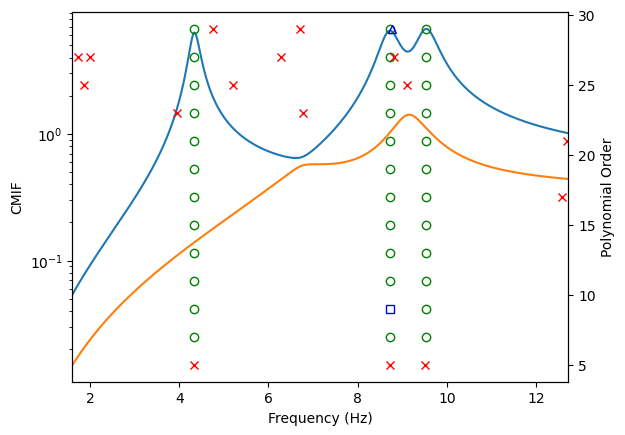

In [41]:
cmif_axis, order_axis = pp.plot_stability()
cmif_axis.set_ylabel('CMIF')
cmif_axis.set_xlabel('Frequency (Hz)')
order_axis.set_ylabel('Polynomial Order')

We can see that as we move up to a higher model order, we start to see more computational poles appear, as shown by the red Xs throughout the frequency band.  However we see the three main columns of green circles denoting three stable poles in our fits.  We would then select these three stable poles.

In `PolyPy` we can select them by index, and we can determine the indices by plotting the stabilization diagram with labels.

Text(0, 0.5, 'Polynomial Order')

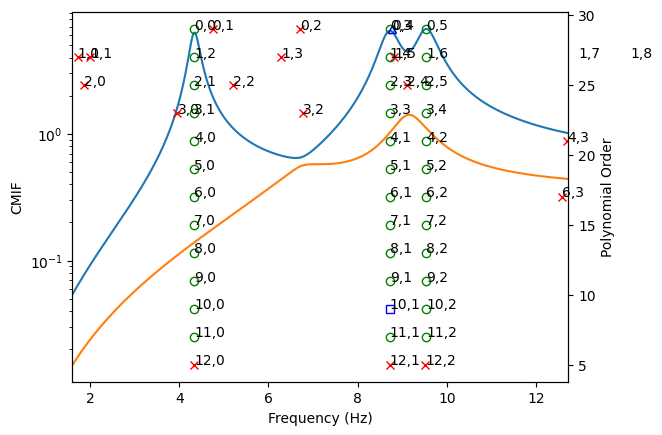

In [42]:
cmif_axis, order_axis = pp.plot_stability(label_poles=True)
cmif_axis.set_ylabel('CMIF')
cmif_axis.set_xlabel('Frequency (Hz)')
order_axis.set_ylabel('Polynomial Order')

We can then extract a final pole list from those indices.  For example we may wish to select poles `(4,0)`, `(4,1)`, and `(4,2)`.

In [43]:
pole_indices = [(4,0), (4,1), (4,2)]
pole_list = pp.pole_list_from_indices(pole_indices)
omega_general_stab = pole_list['omega']
zeta_general_stab = pole_list['zeta']
lr_stab = pole_list['Lr_complex']

The stabilization diagram actually reveals that for our test case of `order=5`, our poles may not have yet stabilized, and therefore our results may be inaccurate!  Let's compare the same quantities extracted from the stabilization diagram with those computed from the system matrices.

In [44]:
df = pd.DataFrame(columns = ['Frequency From System Matrices','Frequency From FRF Fits','Frequency Error',
                             'Damping From System Matrices','Damping From FRF Fits','Damping Error',
                             'Participation From System Matrices','Participation From FRF Fits'],
                  dtype=object)
for i,(wm,wf,zm,zf,lm,lf) in enumerate(zip(
    omega_general,omega_general_stab,
    zeta_general, zeta_general_stab,
    psi_general[:2,:].T, lr_stab)):
    df.at[i,'Frequency From System Matrices'] = '{:0.2f}'.format(wm)
    df.at[i,'Frequency From FRF Fits'] = '{:0.2f}'.format(wf)
    df.at[i,'Frequency Error'] = '{:0.2f}%'.format((wf-wm)/wm*100)
    df.at[i,'Damping From System Matrices'] = '{:0.2f}%'.format(zm*100)
    df.at[i,'Damping From FRF Fits'] = '{:0.2f}%'.format(zf*100)
    df.at[i,'Damping Error'] = '{:0.2f}%'.format((zf-zm)/zm*100)
    # Find the maximum participation degree of freedom from the
    # system matrices
    check_index = np.argmax(np.abs(lm))
    # Compute the angle of that index
    check_angle = np.angle(lm[check_index])
    # Compute the same angle from the fit
    this_angle = np.angle(lf[check_index])
    rotation = check_angle - this_angle
    # Compute the magnitudes of the vectors
    check_magnitude = np.linalg.norm(np.abs(lm))
    this_magnitude = np.linalg.norm(np.abs(lf))
    # Correct rotation and scaling
    lf = lf*np.exp(1j*rotation)*check_magnitude/this_magnitude
    df.at[i,'Participation From System Matrices'] = str(lm)
    df.at[i,'Participation From FRF Fits'] = str(lf)
    
pretty_print_table(df)

,Frequency From System Matrices,Frequency From FRF Fits,Frequency Error,Damping From System Matrices,Damping From FRF Fits,Damping Error,Participation From System Matrices,Participation From FRF Fits
0,27.25,27.26,0.02%,2.71%,2.71%,-0.02%,[-0.04320045+0.04405838j -0.09857882+0.09838338j],[-0.04320045+0.04405838j -0.09857882+0.09838338j]
1,54.78,54.79,0.01%,2.74%,2.74%,-0.01%,[0.06535574-0.06999465j 0.00185538+0.00185558j],[0.06535574-0.06999465j 0.00185538+0.00185558j]
2,59.91,59.92,0.01%,2.66%,2.66%,-0.01%,[-0.06059005+0.05448316j 0.03373321-0.03429903j],[-0.06059006+0.05448316j 0.03373322-0.03429902j]


We now see that we have extracted nearly identical modes to those that were computed directly from the system matrices, meaning the fit has significantly improved by using a higher-order polynomial.

Note that this section has used the code-based `PolyPy` implementation.  However, in SDynPy there is also a `PolyPy_GUI` which can be used to interactively select poles.

```python
ppgui = sdpy.PolyPy_GUI(tfarray)
```
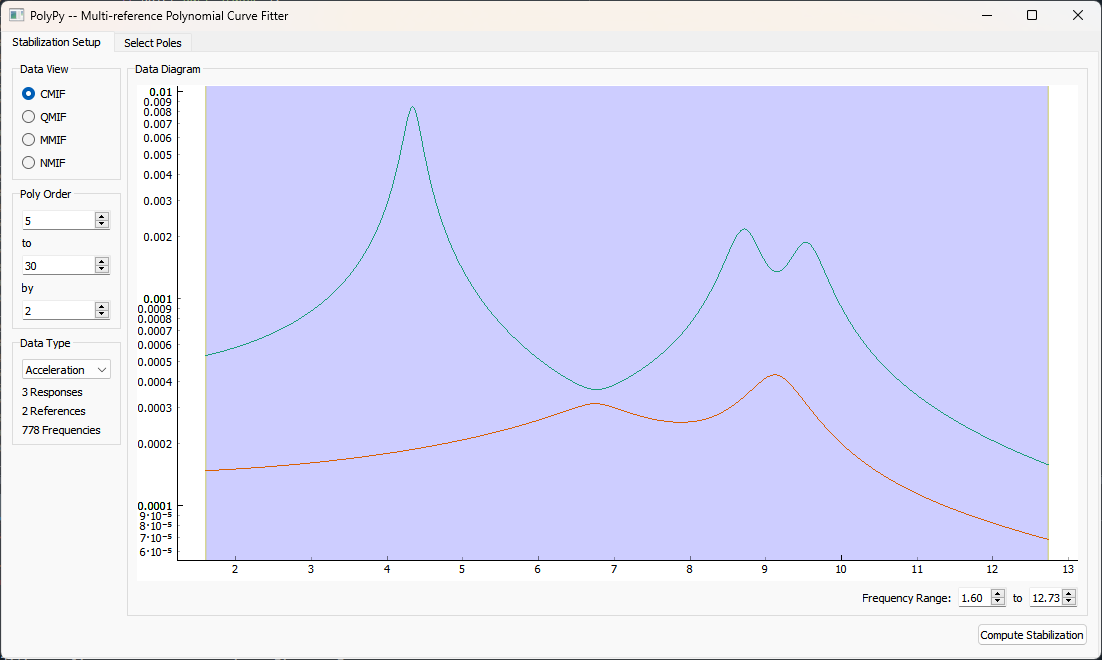
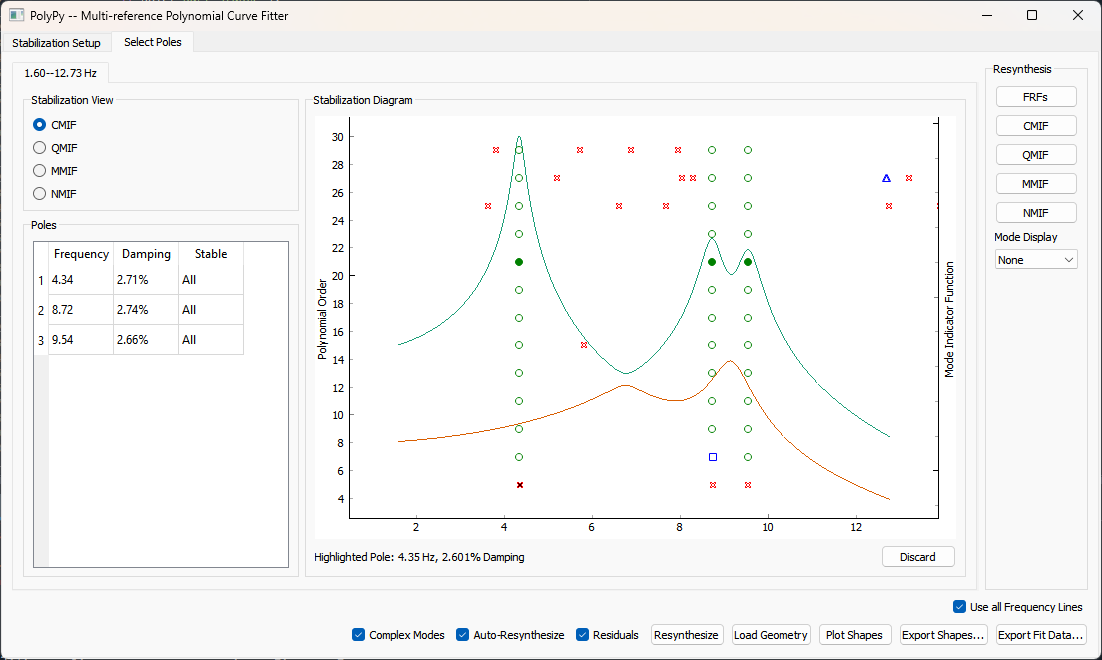

## Fitting Mode Shapes to FRF Data
Once the poles and participation factors are known, we can go ahead and fit the mode shapes of the system.  Looking again at the frequency response function equation
$$\mathbf{H}_{ij} = \sum_{r=1}^N\left( \frac{v_{ir}l_{jr}}{j\omega-\lambda_r} + \frac{v_{ir}^*l_{jr}^*}{j\omega-\lambda_r^*}\right) + \frac{R_{Lij}}{(j\omega)^2} + R_{Uij}$$
containing the frequency response function $\mathbf{H}$, the participation factors $\mathbf{l}_r$, the frequency lines $\omega$, and the poles $\lambda_r$.  We wish to solve for the mode shapes $\mathbf{v}_r$ and the residuals $\mathbf{R}_u$ and $\mathbf{R}_l$.

We want to pose this problem in an entirely real set of equations $\mathbf{A}\mathbf{x}=\mathbf{b}$.

The mode shapes will generally be complex $\mathbf{v}_r = \mathbf{v}_r^R + j \mathbf{v}_r^I$, so we will want to solve simultaneously for the real and imaginary parts.  Similarly, the frequency response function is complex, so we will need to split that up into its real and imaginary parts.  Ignoring the residuals for now:

$$\begin{bmatrix}\mathbf{H}^R\\\mathbf{H}^I\end{bmatrix} = \mathbf{P}\begin{bmatrix}\mathbf{v}^R\\\mathbf{v}^I\end{bmatrix}$$

The goal is to then find the coefficient matrix $\mathbf{P}$ which allows us to solve for the mode shape coefficients.

$$\mathbf{P} = \begin{bmatrix}\mathbf{P}_{RR} & \mathbf{P}_{RI}\\\mathbf{P}_{IR} & \mathbf{P}_{II}\end{bmatrix}$$

We will start with the term

$$\frac{\mathbf{v}_r\mathbf{l}_r^T}{j\omega-\lambda_r} + \frac{\mathbf{v}_r^*{\mathbf{l}_r^*}^T}{j\omega-\lambda_r^*}$$

We will substitute each term with its real and imaginary parts to ensure that all of the variables in the expression are real.
$$\frac{\left(- j l^{I}_{jr} + l^{R}_{jr}\right) \left(- j v^{I}_{ir} + v^{R}_{ir}\right)}{j \lambda^{I}_{r} - \lambda^{R}_{r} + j \omega} + \frac{\left(j l^{I}_{jr} + l^{R}_{jr}\right) \left(j v^{I}_{ir} + v^{R}_{ir}\right)}{- j \lambda^{I}_{r} - \lambda^{R}_{r} + j \omega}$$

As we wish to collect real and imaginary parts, we will want to multiply each term's numerator and denominator by the denominator's complex conjugate.

$$\frac{\left(- j l^{I}_{jr} + l^{R}_{jr}\right) \left(- j v^{I}_{ir} + v^{R}_{ir}\right) \left(- j \lambda^{I}_{r} - \lambda^{R}_{r} - j \omega\right)}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{\left(j l^{I}_{jr} + l^{R}_{jr}\right) \left(j v^{I}_{ir} + v^{R}_{ir}\right) \left(j \lambda^{I}_{r} - \lambda^{R}_{r} - j \omega\right)}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}$$

We would then like to collect real and imaginary terms, as well as collecting terms that have the real and imaginary part of the mode shapes.  $\mathbf{P}_{RR}$ will contain real coefficients of the real part of the mode shapes.  $\mathbf{P}_{RI}$ will contain real coefficients of the imaginary part of the mode shapes.  $\mathbf{P}_{IR}$ will contain imaginary coefficients of the real part of the mode shapes.  Finally, $\mathbf{P}_{II}$ will contain imaginary coefficients of the imaginary part of the mode shapes.

$$j v^{I}_{ir} \left(\frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega + l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\right) + v^{I}_{ir} \left(\frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} + l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\right)$$
$$+ v^{R}_{ir} \left(\frac{- l^{I}_{jr} \lambda^{I}_{r} - l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\right) + j v^{R}_{ir} \left(\frac{- l^{I}_{jr} \lambda^{R}_{r} + l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\right)$$

We can substitute this into a matrix form where the real equations are on the top row and the imaginary equations are on the bottom row.

$$\left[\begin{matrix}H_r^{R}\\j H_r^{I}\end{matrix}\right] = \left[\begin{matrix}\frac{- l^{I}_{jr} \lambda^{I}_{r} - l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} + l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\\j \left(\frac{- l^{I}_{jr} \lambda^{R}_{r} + l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\right) & j \left(\frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega + l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\right)\end{matrix}\right] \left[\begin{matrix}v^{R}_{ir}\\v^{I}_{ir}\end{matrix}\right]$$

Cancelling out the $j$ terms in the bottom row reveals the final matrix equation for the contribution to the frequency response function from one mode shape $H_r$.

$$\left[\begin{matrix}H_r^{R}\\H_r^{I}\end{matrix}\right] = \left[\begin{matrix}\frac{- l^{I}_{jr} \lambda^{I}_{r} - l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} + l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\\\frac{- l^{I}_{jr} \lambda^{R}_{r} + l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega + l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\end{matrix}\right] \left[\begin{matrix}v^{R}_{ir}\\v^{I}_{ir}\end{matrix}\right]$$

We can then solve this equation in a least squares sense by using the pseudoinverse.

$$\left[\begin{matrix}v^{R}_{ir}\\v^{I}_{ir}\end{matrix}\right] = \left[\begin{matrix}\frac{- l^{I}_{jr} \lambda^{I}_{r} - l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} + l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\\\frac{- l^{I}_{jr} \lambda^{R}_{r} + l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega + l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}}\end{matrix}\right]^+ \left[\begin{matrix}H_r^{R}\\H_r^{I}\end{matrix}\right]$$

Note that this equation must be generalized to solve for all modal coefficients simultaneously in terms of all frequency response functions for all degrees of freedom at all frequency lines.  For this we will give some thought as to how to structure the matrices.

At the end of the computation, the matrix $\left[\begin{matrix}v^{R}_{ir}\\v^{I}_{ir}\end{matrix}\right]$ should have real and imaginary parts for each degree of freedom for each mode being solved for.  We will solve for these terms over all frequency lines simultaneously.  However, because there is no frequency line dimension in the mode shape matrix, this reveals that the frequency line must be on the inner dimension of the matrix product.  The frequency lines must correspond to the rows of $\left[\begin{matrix}H_r^{R}\\H_r^{I}\end{matrix}\right]$ and $\mathbf{P}$ (which will be the columns of $\mathbf{P}^+$).  We also see that the columns of the FRF matrix corresponding to the references at each frequency line do not appear in the final mode shape matrix (they are related to the participation factors, which are known).  Therefore this dimension must also be encoded in the inner dimensions of the matrix product.

We can therefore start to envision what the structure of each term in $\mathbf{P}$ should look like.  The columns of $\mathbf{P}$ (the rows of $\mathbf{P}^+$) must correspond to the mode shape matrix, and they should correspond to the mode index rather than the response degree of freedom index because we need matrix multiplication of $\mathbf{P}\mathbf{v}$ to sum over modes, and summation occurs on the inner dimensions of the matrices in matrix multiplication.  The rows of $\mathbf{P}$ (the columns of $\mathbf{P}^+$) must correspond to both the mode participation factor (reference degrees of freedom) and frequency lines, separated into real and imaginary parts.  If we compute each partition of $\mathbf{P}$ as a `num_input` $\times$ `num_freq` $\times$ `num_modes` array, and then reshape it into a `num_input*num_freq` $\times$ `num_modes` array, this should produce the correct size matrix.

Each partition of the mode shape matrix $v^{R}_{ir}$ and $v^{I}_{ir}$ will then be revealed as a matrix with number of rows equal to the number of modes and columns equal to the number of response degrees of freedom.

We can similarly construct the dimensions of the partitions $H_r^{R}$ and $H_r^{I}$, as they must now be consistent with the rest of the terms in the equation.  The number of rows of these partitions must match the number of rows of partitions in $\mathbf{P}$, meaning that the FRF must be similarly structured with mode participation factor (reference degrees of freedom) and frequency lines along its rows and response degrees of freedom along its columns.

This generalization into matrix form can be somewhat abstract to visualize, but should become more obvious when applied to real data arrays.

### Fitting Residuals for Out-of-Band Modes
We note that the terms $v_{ir}$ are not the only unknowns in the frequency response function formulation.  In general, we can never fit all of the modes of a structure, so there will always be some contributions from out-of-band modes in our frequency response functions.  As we try to solve for the mode shapes of the structure, these out-of-band modes can contaminate the response.  Therefore we also include terms to try to match the contributions from these out-of-band modes, and we call these terms residuals.

We will in general have a lower residual $R_{Lij}$ and an upper residual $R_{Uij}$, and as the expression suggests, there can be one term in the residual for each pair of input and output degrees of freedom.  We must therefore solve for these terms simultaneously with the mode shapes.  We can think of these terms as "extra modes" of the structure, which therefore should imply that the $\mathbf{P}$ matrix should have columns added corresponding to the coefficients of the residual variables, and the $\left[\begin{matrix}v^{R}_{ir}\\v^{I}_{ir}\end{matrix}\right]$ matrix should have rows appended corresponding to the real and imaginary parts of these terms.

Indeed, the coefficients are easily picked directly from the frequency response function.

$$\mathbf{H}_{ij} = \sum_{r=1}^N\left( \frac{v_{ir}l_{jr}}{j\omega-\lambda_r} + \frac{v_{ir}^*l_{jr}^*}{j\omega-\lambda_r^*}\right) + \frac{R_{Lij}}{(j\omega)^2} + R_{Uij}$$

$$\left[\begin{matrix}H_r^{R}\\H_r^{I}\end{matrix}\right]
= \left[\begin{matrix}\frac{- l^{I}_{jr} \lambda^{I}_{r} - l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} + l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & -\frac{1}{\omega^2} & 0 & 1 & 0 \\
\frac{- l^{I}_{jr} \lambda^{R}_{r} + l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{R}_{r} - l^{R}_{jr} \lambda^{I}_{r} - l^{R}_{jr} \omega}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & \frac{- l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega - l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} - 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} + \frac{l^{I}_{jr} \lambda^{I}_{r} + l^{I}_{jr} \omega + l^{R}_{jr} \lambda^{R}_{r}}{\left(\lambda^{I}_{r}\right)^{2} + 2 \lambda^{I}_{r} \omega + \left(\lambda^{R}_{r}\right)^{2} + \omega^{2}} & 0 & -\frac{1}{\omega^2} & 0  & 1\end{matrix}\right] \left[\begin{matrix}v^{R}_{ir}\\v^{I}_{ir}\\R^R_{Lij}\\R^I_{Lij}\\R^R_{Uij}\\R^I_{Uij}\end{matrix}\right]$$

When generalizing to multiple references, responses, and frequency lines, each residual term $R^R_{Lij}$, $R^I_{Lij}$, $R^R_{Uij}$ and $R^I_{Uij}$ will have a number of rows equal to the number of references and a number of columns equal to the number of responses.  Similarly the coefficient terms ($0$, $1$, $-\frac{1}{\omega}$) will have a number of rows equal to the number of `num_freq*num_input` and number of columns equal to `num_input`.  Because of the structure of the matrices, they are easily constructed using Kronecker products of identity matrices multiplied by either $1$ or $-\frac{1}{\omega^2}$.

### A Note on Types of FRFs
Note that the mode shape derivations described in the previous sections are valid for *receptance* FRFs, meaning FRFs between displacement and force.  When transforming to from *receptance* to *mobility* (velocity over force) to *accelerance* (acceleration over force) FRFs, we multiply the FRF expression by $j\omega$ at each step.  This will clearly change which terms are real and which terms are imaginary, as well as the coefficients on each term.  As this document is already quite long, these will not be derived, but the same approach as described above can be used to find the coefficient matrices for those cases; simply substitute for real and imaginary parts of each variable, collect imaginary and real coefficients for imaginary and real parts of each term of interest, and place them into a matrix form.

### Normalizing Mode Shapes
Once we solve for the mode shapes, our job is not quite done.  Due to how the problem is formulated, the particpation factors have some arbitrary scaling and rotation applied to them.  This means when the shapes are found, they will also have an arbitrary scaling and rotation applied to them.  There is no constraint that the participation factors are identical to the mode shapes at the input locations.

To perform the normalization, we compute the residue matrices for each mode

$$R_{rij} = \psi_{ir}l_{jr}$$

We recognize the at the drive point, the residue is equal to the mode shape squared or the participation factor squared if the mode shapes are scaled such that the participation factors are the mode shapes.
$$R_{rii} = \psi_{ir}l_{ir} = \psi_{ir}^2 = l_{ir}^2$$

However, we currently do not have such a scenario.  In our case, the fit shapes $\bar{\psi}_{ir}$ are scaled by some complex coefficient $c$, and the participation factors $\bar{l}_{jr}$ are scaled by some factor ${\frac{1}{c}}$.

$$\psi_{ir} = c\bar{\psi}_{ir}$$
$$l_{jr} = \frac{1}{c}\bar{l}_{jr}$$

We note that due to the reciprocal scale factors, we can still compute the residuals.  We can therefore set up a set of equations to solve for the scale factor that gets applied to the mode shapes.

$$R_{rii} = \psi_{ir}l_{ir} = c\bar{\psi}_{ir}\frac{1}{c}\bar{l}_{ir} = \bar{\psi}_{ir}\bar{l}_{ir}$$
$$R_{rii} = \psi_{ir}^2 = c^2\bar{\psi}_{ir}^2$$
$$\sqrt{R_{rii}} = c \bar{\psi}_{ir}$$

Since we have participation factors and shapes at multiple degrees of freedom for a multiple-input solution, we can solve for the scale factor $c$ in a least-squares sense for each mode.

$$\begin{bmatrix}\sqrt{R_{r11}} \\ \sqrt{R_{r22}} \\ \vdots \\ \sqrt{R_{r{N_i}{N_i}}}\end{bmatrix} = \begin{bmatrix}\bar{\psi}_{1r}\\\bar{\psi}_{2r}\\\vdots\\\bar{\psi}_{{N_i}r}\end{bmatrix}c$$

$$\begin{bmatrix}\bar{\psi}_{1r}\\\bar{\psi}_{2r}\\\vdots\\\bar{\psi}_{{N_i}r}\end{bmatrix}^+\begin{bmatrix}\sqrt{R_{r11}} \\ \sqrt{R_{r22}} \\ \vdots \\ \sqrt{R_{r{N_i}{N_i}}}\end{bmatrix} = c$$

**BE AWARE:** when taking the square root of the residue matrix terms, there are two values that can be obtained (e.g. $\sqrt{4} = \pm2$).  In the case of real numbers, most square root algorithms will only return the positive root.  However for complex numbers, it is not so obvious which sign the root will have (positive real part?  positive imaginary part?).  Flipping a sign on one term in the matrix $\begin{bmatrix}\sqrt{R_{r11}} \\ \sqrt{R_{r22}} \\ \vdots \\ \sqrt{R_{r{N_i}{N_i}}}\end{bmatrix}$ will make the least squares solution incorrect, therefore we must make sure the signs are consistent between the mode shapes $\bar{\psi}_{ir}$ and the residue terms $\sqrt{R_{rii}}$.

We can do this by dividing the termes $\sqrt{R_{rii}}$ by $\bar{\psi}_{ir}$ and looking at the direction of the complex vectors.  If the vectors are all pointing nominally the same direction, then the least squares problem will solve for that direction successfully.  If some are pointing opposite due to the sign of the output of the square root, then the scale factor found by the least squares solution will be incorrect.

### Back to the Example Problem
While the symbolic mathematics in the previous sections was straightforward (though perhaps a bit tedious), the discussion of the construction of a system of equations to solve for each coefficient of the mode shape matrix was perhaps a bit abstract.  We will therefore make it more concrete by applying it to our specific example problem.  Note that we will take advantage heavily of broadcasting and dimensional manipulation to help us put these equations together.  Readers are encouraged to run these problems themselves to understand exactly what operations are being performed at each step, and the resulting shapes of all of the arrays.

We will first generate the $\mathbf{P}$ matrix described above.  We will start with only the mode shape coefficients, then show how it can be expanded to include residuals.  This will involve translating our symbolic code into numeric Numpy code.  To help us repeat this process for different sets of modes and frequency ranges when we introduce the residuals later, we will define the process to generate the $\mathbf{P}$ matrix as a function.

In [45]:
def P_modal(omegas, poles, participation_factors):
    '''Construct the mode shape coefficient matrix

    Constructs the coefficients from the system poles,
    participation factors, and frequency lines.

    Arguments should be passed as arrays and will be broadcast
    together.
    '''
    # We want the output array to be n_input x n_freq*2 x n_modes*2
    # So let's adjust the terms so they have the right shapes
    # We want frequency lines to be the middle dimension
    omegas = omegas[np.newaxis,:,np.newaxis]
    # We want inputs to be the first dimension and modes the
    # last dimension
    participation_factors = participation_factors.T[:,np.newaxis,:]
    # Split up terms into real and imaginary parts
    pr = poles.real
    pi = poles.imag
    lr = participation_factors.real
    li = participation_factors.imag
    P_blocks = np.array([
        [(-pr*lr - pi*li - li*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2)
          + (-pr*lr - pi*li + li*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2),
         (pr*li - pi*lr - lr*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2)
          + (pr*li - pi*lr + lr*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2)],
        [(-pr*li + pi*lr - lr*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2)
          + (pr*li - pi*lr - lr*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2),
         (-pr*lr - pi*li + li*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2)
          + (pr*lr + pi*li + li*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2)]])
    return np.block([[P_blocks[0,0],P_blocks[0,1]],
                     [P_blocks[1,0],P_blocks[1,1]]])

We can now create our pole vector from the extracted frequencies and damping ratios.

In [46]:
# Compute poles from the extracted data
poles = -omega_general_stab*zeta_general_stab + 1j*omega_general_stab*np.sqrt(1-zeta_general_stab**2)
# Compute P with our function
P = P_modal(omegas,poles, lr_stab)

# Check shapes
print('Shapes:\n  omegas: {:}\n  poles: {:}\n  participation_factors: {:}\n  P: {:}'.format(
    omegas.shape, poles.shape, lr_stab.shape, P.shape))

Shapes:
  omegas: (778,)
  poles: (3,)
  participation_factors: (3, 2)
  P: (2, 1556, 6)


We must now set up the frequency response functions to perform the least squares computation.

In [47]:
H_LS = H.transpose(1,2,0)
H_LS = np.concatenate((H_LS.real,H_LS.imag),axis=1)

print('Shapes:\n  H_LS: {:}'.format(
    H_LS.shape))

Shapes:
  H_LS: (2, 1556, 3)


To construct the least-squares set of equations, we simply squash the first two dimensions into a single dimension, in which case the least-squares solution will solve over all frequency lines and all inputs simultaneously.

In [48]:
shapes_LS = np.linalg.lstsq(P.reshape(-1,P.shape[-1]),
                            H_LS.reshape(-1,H_LS.shape[-1]))[0]

We can reconstruct the FRF by muliplying the output shapes by the coefficient matrix and extracting real and imaginary parts.

In [49]:
reconstructed_frfs = P.reshape(-1,P.shape[-1])@shapes_LS
H_recon = reconstructed_frfs.reshape(*H_LS.shape).transpose(1,2,0)
H_recon = H_recon[:H_recon.shape[0]//2] + 1j*H_recon[H_recon.shape[0]//2:]

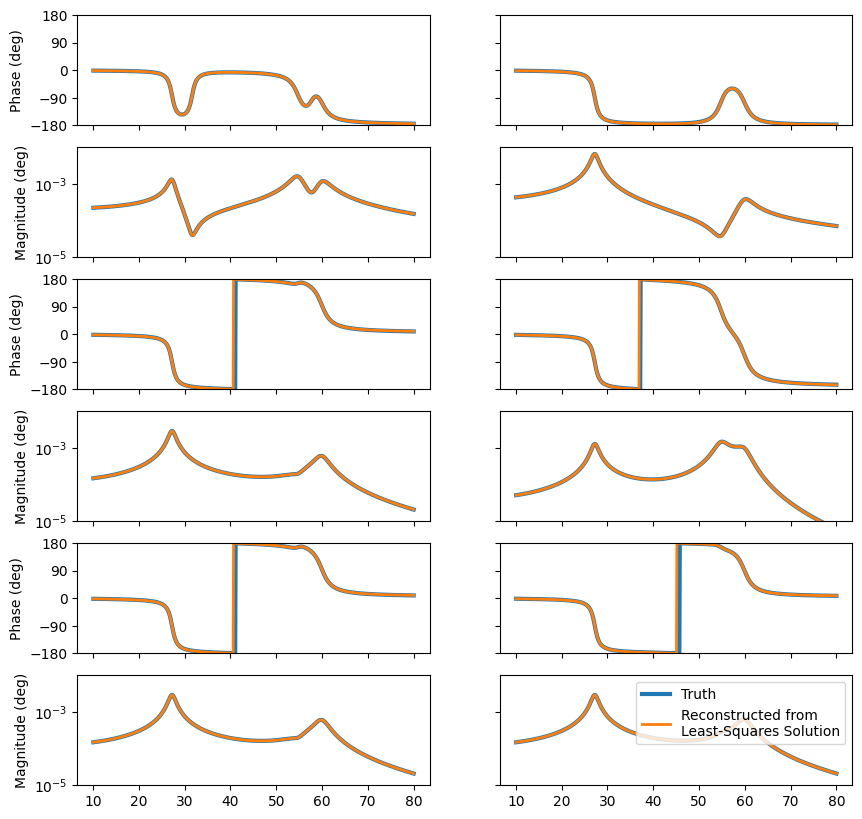

In [50]:
num_modes = omega_general_stab.size
omegas_bc = omegas[:,np.newaxis,np.newaxis]
# Compute the laplace variables
s=1j*omegas_bc

# Now plot them
fig,axes = plt.subplots(num_output*2,num_input, sharex=True,sharey='row',figsize=(10,10))
for ax,f_d,f_m in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                      H_general[frequency_lines_to_keep,:,:2].reshape(omegas.size,-1).T,
                      H_recon.reshape(omegas.size,-1).T,
                      ):
    ax[0].plot(omegas,np.angle(f_d)*180/np.pi,linewidth=3)
    ax[0].plot(omegas,np.angle(f_m)*180/np.pi,linewidth=2)
    ax[1].plot(omegas,np.abs(f_d),linewidth=3)
    ax[1].plot(omegas,np.abs(f_m),linewidth=2)
ax[1].legend(['Truth','Reconstructed from\nLeast-Squares Solution'])
for i,ax in enumerate(axes[:,0]):
    if i % 2 == 0:
        ax.set_ylim([-180,180])
        ax.set_yticks([-180,-90,0,90,180])
        ax.set_ylabel('Phase (deg)')
    else:
        ax.set_ylim([1e-5,1e-2])
        ax.set_ylabel('Magnitude (deg)')
        ax.set_yscale('log')

We have now solved in a least-squares sense for our modal coefficients.  We should extract the shape arrays from the matrix.  The top partition will be the real part of the shape, and the bottom part will be the imaginary part of the shape.  Remember also that the terms are transposed from the typical mode shape matrix.

In [51]:
psi_stab = (shapes_LS[:shapes_LS.shape[0]//2]+1j*shapes_LS[shapes_LS.shape[0]//2:]).T

Note that because the participation factors were arbitrarily rotated, these shapes will also be arbitrarily rotated.  Therefore we need to normalize the mode shapes.  We will do this by computing the residue matrices.

In [52]:
residues = np.einsum('ik,jk->kij',psi_stab,lr_stab.T)

We can get the drive point response indices corresponding to the participation factors and pull out the drive point residues.  In general, the drive point residues should have a negative imaginary part, so we can use this to discard 'bad' drive point data where the drive point does not excite the mode well.

In [53]:
drive_indices_response = np.array([0,1])
drive_indices_input = np.array([0,1])
drive_residues = residues[:,drive_indices_response,drive_indices_input]

We will now go through each mode and compute the correct shape scaling using only the good drive points where the imaginary part is negative and not close to zero.  First, let's go through and make sure that our participation factors and mode shapes that we solved for are actually scaled versions of the true mode shapes.  I'm going to mass normalize my mode shapes for better comparisions to the fit data without having to carry around the modal mass term.

In [54]:
# Mass normalize the mode shapes
psi_general /= np.sqrt(ma_general)

Let's find the scale factor between the participation factors and the mode shapes at the participation factors.  We will average over all of the degrees of freedom for each mode.

In [55]:
lr_scaling = np.mean(psi_general[:2,:]/lr_stab.T,axis=0)

In [56]:
lr_scaling

array([ 0.18452662-0.18416078j,  0.08928666-0.0956242j ,
       -0.093857  +0.08439714j])

We can then check to see if we reconstruct the mode shape by applying the scaling to the participation factors.

In [57]:
lr_stab.T*lr_scaling

array([[-0.02160023+0.02202919j,  0.03267784-0.03499731j,
        -0.03029502+0.02724158j],
       [-0.04928941+0.04919169j,  0.00092769+0.00092779j,
         0.01686661-0.01714951j]])

In [58]:
psi_general[:2,:]

array([[-0.02160023+0.02202919j,  0.03267787-0.03499732j,
        -0.03029503+0.02724158j],
       [-0.04928941+0.04919169j,  0.00092769+0.00092779j,
         0.0168666 -0.01714951j]])

Now we will do the same thing for the mode shapes.

In [59]:
psi_scaling = np.mean(psi_general/psi_stab,axis=0)

In [60]:
psi_scaling

array([ 2.70380647+2.72025259j,  5.15973139+5.66778918j,
       -5.88158134-5.30751768j])

Let's reconstruct the mode shapes by scaling the fit mode shapes.

In [61]:
psi_stab*psi_scaling

array([[-0.02159971+0.02202864j,  0.03316166-0.03473379j,
        -0.03033178+0.02722321j],
       [-0.04928856+0.04919178j,  0.00094139+0.00090236j,
         0.0168663 -0.01716533j],
       [-0.02186329+0.02176496j, -0.03539605+0.03236945j,
        -0.02735936+0.03018341j]])

In [62]:
psi_general

array([[-0.02160023+0.02202919j,  0.03267787-0.03499732j,
        -0.03029503+0.02724158j],
       [-0.04928941+0.04919169j,  0.00092769+0.00092779j,
         0.0168666 -0.01714951j],
       [-0.02186239+0.02176446j, -0.03496025+0.03263839j,
        -0.02739619+0.03019566j]])

Since the particpation factors times the mode shapes should be equal to the scaled mode shapes squared, we should be able to see that the scale factors are reciprocals of one another.

In [63]:
psi_scaling

array([ 2.70380647+2.72025259j,  5.15973139+5.66778918j,
       -5.88158134-5.30751768j])

In [64]:
1/lr_scaling

array([ 2.71501354+2.70963081j,  5.2165319 +5.58679996j,
       -5.89109483-5.29733029j])

This was a sanity check to make sure the mode shapes and participation factors were identified consistently.  Unfortunately in a real situation we don't have the true mode shapes, so we need to compute them from the residue matrices.

In [65]:
psi_stab_normalized = []
for k,drive_residue in enumerate(drive_residues):
    # Throw away non-negative imaginary parts
    bad_indices_positive = drive_residue.imag > 0
    # Throw away small values compared to the average value (only considering negative imaginary parts)
    bad_indices_small = np.abs(drive_residue) < 0.01*np.mean(np.abs(drive_residue[~bad_indices_positive]))
    # Combine into a single criteria
    bad_indices = bad_indices_positive | bad_indices_small
    # Get the good indices that are remaining
    remaining_indices = np.where(~bad_indices)[0]
    # We will then construct the least squares solution
    shape_coefficients = psi_stab[drive_indices_response[remaining_indices],k][:,np.newaxis]
    residue_coefficients = np.sqrt(drive_residue[remaining_indices])[:,np.newaxis]
    # Before we compute the scale, we need to make sure that we have all of the signs the same way.
    # This is because the square root can give you +/- root where root**2 = complex number
    # This will mess up the least squares at it will try to find something between the
    # two vectors.
    scale_vector = (residue_coefficients/shape_coefficients).flatten()
    sign_vector = np.array((scale_vector.real,scale_vector.imag))
    # Get the signs
    signs = np.sign(np.dot(sign_vector[:,0],sign_vector))
    residue_coefficients = residue_coefficients*signs[:,np.newaxis]
    # Now compute the least-squares solution
    scale = np.linalg.lstsq(shape_coefficients,residue_coefficients)[0].squeeze()
    print('Scale for mode {:}: {:}'.format(k+1,scale))
    psi_stab_normalized.append(psi_stab[:,k]*scale)
psi_stab_normalized = np.array(psi_stab_normalized).T

Scale for mode 1: (-2.709418738512416-2.7149722671668157j)
Scale for mode 2: (5.211812790651124+5.590252990269536j)
Scale for mode 3: (5.886705065831037+5.299694143958719j)


Now that we have our mode shapes, we should resynthesize frequency response functions from them to make sure they fit our original data.

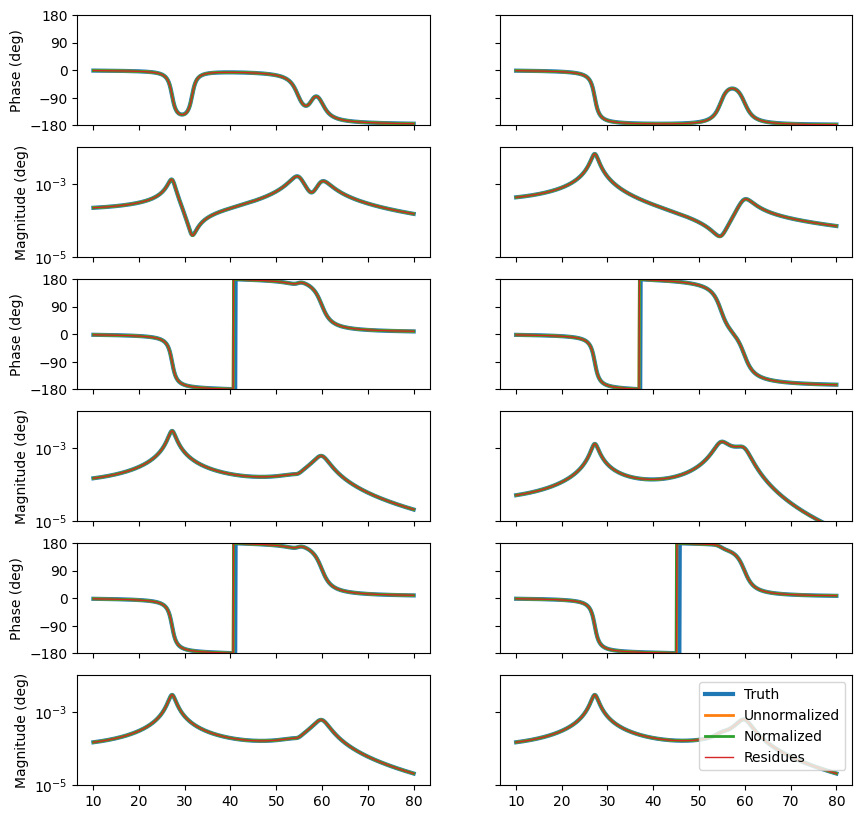

In [66]:
num_modes = omega_general_stab.size
omegas_bc = omegas[:,np.newaxis,np.newaxis]
# Compute the laplace variables
s=1j*omegas_bc

H_general_fromUnNormModes = np.sum([
    psi_stab[:,r,np.newaxis]@lr_stab.T[:,r,np.newaxis].T/
    ((s-
        (-zeta_general_stab[r]*omega_general_stab[r] + 1j*omega_general_stab[r]*np.sqrt(1-zeta_general_stab[r]**2))))
    + psi_stab[:,r,np.newaxis].conj()@lr_stab.T[:,r,np.newaxis].T.conj()/
    ((s-
        (-zeta_general_stab[r]*omega_general_stab[r] - 1j*omega_general_stab[r]*np.sqrt(1-zeta_general_stab[r]**2))))
    for r in range(num_modes)],axis=0)

H_general_fromFitModes = np.sum([
    psi_stab_normalized[:,r,np.newaxis]@psi_stab_normalized[drive_indices_input,r,np.newaxis].T/
    ((s-
        (-zeta_general_stab[r]*omega_general_stab[r] + 1j*omega_general_stab[r]*np.sqrt(1-zeta_general_stab[r]**2))))
    + psi_stab_normalized[:,r,np.newaxis].conj()@psi_stab_normalized[drive_indices_input,r,np.newaxis].T.conj()/
    ((s-
        (-zeta_general_stab[r]*omega_general_stab[r] - 1j*omega_general_stab[r]*np.sqrt(1-zeta_general_stab[r]**2))))
    for r in range(num_modes)],axis=0)

H_general_fromFitResidues = np.sum([
    residues[r]/
    ((s-
        (-zeta_general_stab[r]*omega_general_stab[r] + 1j*omega_general_stab[r]*np.sqrt(1-zeta_general_stab[r]**2))))
    + residues[r].conj()/
    ((s-
        (-zeta_general_stab[r]*omega_general_stab[r] - 1j*omega_general_stab[r]*np.sqrt(1-zeta_general_stab[r]**2))))
    for r in range(num_modes)],axis=0)

# Now plot them
fig,axes = plt.subplots(H_general_fromFitResidues.shape[1]*2,H_general_fromFitResidues.shape[2], sharex=True,sharey='row',figsize=(10,10))
for ax,f_t,f_m,f_r,f_u in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                      H_general[frequency_lines_to_keep,:H_general_fromFitResidues.shape[1],:H_general_fromFitResidues.shape[2]].reshape(omegas.size,-1).T,
                      H_general_fromFitModes[:,:H_general_fromFitResidues.shape[1],:H_general_fromFitResidues.shape[2]].reshape(omegas.size,-1).T,
                      H_general_fromFitResidues.reshape(omegas.size,-1).T,
                      H_general_fromUnNormModes.reshape(omegas.size,-1).T
                      ):
    ax[0].plot(omegas,np.angle(f_t)*180/np.pi,linewidth=3)
    ax[0].plot(omegas,np.angle(f_u)*180/np.pi,linewidth=2)
    ax[0].plot(omegas,np.angle(f_m)*180/np.pi,linewidth=2)
    ax[0].plot(omegas,np.angle(f_r)*180/np.pi,linewidth=1)
    ax[1].plot(omegas,np.abs(f_t),linewidth=3)
    ax[1].plot(omegas,np.abs(f_u),linewidth=2)
    ax[1].plot(omegas,np.abs(f_m),linewidth=2)
    ax[1].plot(omegas,np.abs(f_r),linewidth=1)
ax[1].legend(['Truth','Unnormalized','Normalized','Residues'])
for i,ax in enumerate(axes[:,0]):
    if i % 2 == 0:
        ax.set_ylim([-180,180])
        ax.set_yticks([-180,-90,0,90,180])
        ax.set_ylabel('Phase (deg)')
    else:
        ax.set_ylim([1e-5,1e-2])
        ax.set_ylabel('Magnitude (deg)')
        ax.set_yscale('log')

The last demonstration will be to understand how residuals can be implemented.  To do this, we will truncate the frequency domain to remove the first mode.  We will then use residuals to try to fit the effect of this mode while only truly fitting the second two modes.  We will assume we have correctly identified the poles and participation factors from the first analysis, and only consider solving the shape problem here.

We will update our function to solve for the $\mathbf{P}$ matrix to also solve for residual terms.

In [67]:
def P_modal_w_residuals(omegas, poles, participation_factors, lower_residuals = False, upper_residuals = False):
    '''Construct the mode shape coefficient matrix

    Constructs the coefficients from the system poles,
    participation factors, and frequency lines.

    Arguments should be passed as arrays and will be broadcast
    together.
    '''
    # Get the number of modes and number of inputs from the shape
    # of the participation factors.
    n_modes,n_inputs = participation_factors.shape
    n_freq, = omegas.shape
    # We want the output array to be n_input x n_freq*2 x n_modes*2
    # So let's adjust the terms so they have the right shapes
    # We want frequency lines to be the middle dimension
    omegas = omegas[np.newaxis,:,np.newaxis]
    # We want inputs to be the first dimension and modes the
    # last dimension
    participation_factors = participation_factors.T[:,np.newaxis,:]
    # Split up terms into real and imaginary parts
    pr = poles.real
    pi = poles.imag
    lr = participation_factors.real
    li = participation_factors.imag
    P_blocks = np.array([
        [(-pr*lr - pi*li - li*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2)
          + (-pr*lr - pi*li + li*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2),
         (pr*li - pi*lr - lr*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2)
          + (pr*li - pi*lr + lr*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2)],
        [(-pr*li + pi*lr - lr*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2)
          + (pr*li - pi*lr - lr*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2),
         (-pr*lr - pi*li + li*omegas)/(pr**2 + pi**2 - 2*pi*omegas + omegas**2)
          + (pr*lr + pi*li + li*omegas)/(pr**2 + pi**2 + 2*pi*omegas + omegas**2)]])
    if lower_residuals:
        RL_block = np.concatenate([
            np.kron(-1/omegas**2,np.kron(np.eye(n_inputs)[:,np.newaxis],[1,0])),
            np.kron(-1/omegas**2,np.kron(np.eye(n_inputs)[:,np.newaxis],[0,1]))],axis=1)
    if upper_residuals: 
        RU_block = np.concatenate([
            np.kron(np.ones((omegas.size,1)),np.kron(np.eye(n_inputs)[:,np.newaxis],[1,0])),
            np.kron(np.ones((omegas.size,1)),np.kron(np.eye(n_inputs)[:,np.newaxis],[0,1]))],axis=1)
    P = np.block([[P_blocks[0,0],P_blocks[0,1]],
                  [P_blocks[1,0],P_blocks[1,1]]])
    if lower_residuals:
        P = np.concatenate((P,RL_block),axis=-1)
    if upper_residuals:
        P = np.concatenate((P,RU_block),axis=-1)
    return P

We can then call the function with a subset of the modes that we aim to solve for.

In [68]:
min_freq = 45
mode_indices = slice(1,None)
P = P_modal_w_residuals(omegas[omegas > min_freq],
                        poles[mode_indices],
                        lr_stab[mode_indices],
                        lower_residuals = True, upper_residuals = True)

H_LS = H[...,omegas>min_freq].transpose(1,2,0)
H_LS = np.concatenate((H_LS.real,H_LS.imag),axis=1)

print('Shapes:\n  P: {:}\n  H_LS: {:}'.format(P.shape,H_LS.shape))

Shapes:
  P: (2, 778, 12)
  H_LS: (2, 778, 3)


We can then solve the least squares problem over all frequency lines and inputs.

In [69]:
shapes_LS = np.linalg.lstsq(P.reshape(-1,P.shape[-1]),
                            H_LS.reshape(-1,H_LS.shape[-1]))[0]

Now at this point, we can reconstruct the portions of the FRFs from the modes and those from the residuals.

In [70]:
P_full = P.reshape(-1,P.shape[-1])
P_modes = P_full[...,:2*poles[mode_indices].size]
P_residuals = P_full[...,2*poles[mode_indices].size:]

shapes_modes = shapes_LS[:2*poles[mode_indices].size]
shapes_residuals = shapes_LS[2*poles[mode_indices].size:]

H_modes = (P_modes@shapes_modes).reshape(*H_LS.shape).transpose(1,2,0)
H_modes = H_modes[:H_modes.shape[0]//2] + 1j*H_modes[H_modes.shape[0]//2:]

H_residuals = (P_residuals@shapes_residuals).reshape(*H_LS.shape).transpose(1,2,0)
H_residuals = H_residuals[:H_residuals.shape[0]//2] + 1j*H_residuals[H_residuals.shape[0]//2:]

H_full = (P_full@shapes_LS).reshape(*H_LS.shape).transpose(1,2,0)
H_full = H_full[:H_full.shape[0]//2] + 1j*H_full[H_full.shape[0]//2:]

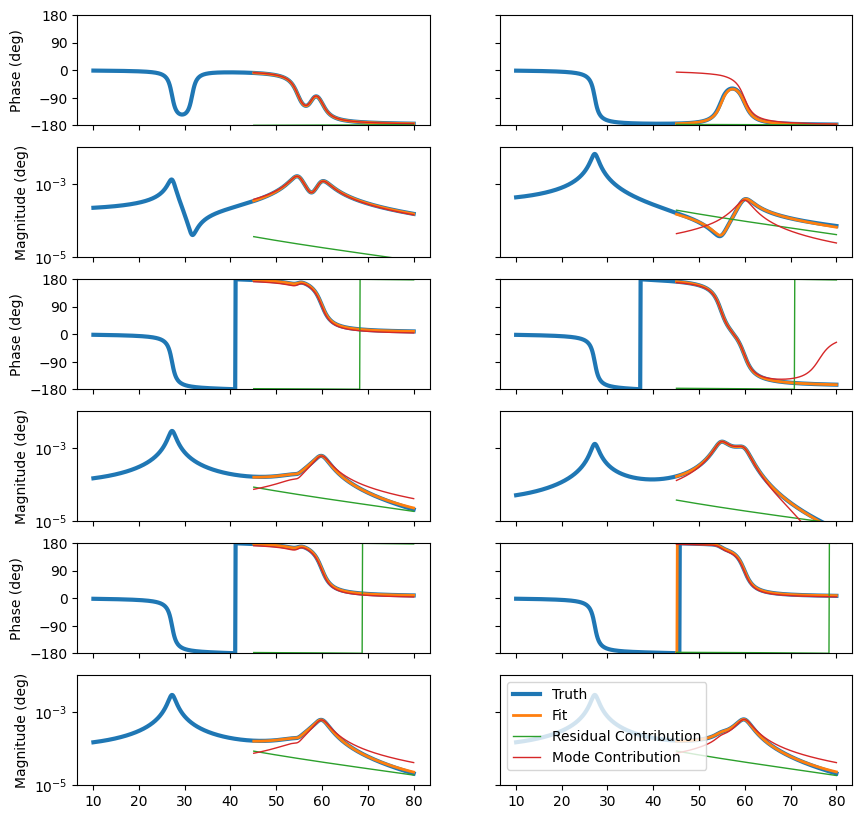

In [71]:
# Now plot them
fig,axes = plt.subplots(H_full.shape[1]*2,H_full.shape[2], sharex=True,sharey='row',figsize=(10,10))
for ax,f_t in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                      H_general[frequency_lines_to_keep,:,:2].reshape(omegas.size,-1).T,
                      ):
    ax[0].plot(omegas,np.angle(f_t)*180/np.pi,linewidth=3)
    ax[1].plot(omegas,np.abs(f_t),linewidth=3)
for ax,f_r,f_m,f_f in zip(axes.T.reshape(-1, 2), # Reshape so we pull of a mag and phase plot for each entry
                      H_residuals.reshape(omegas[omegas>min_freq].size,-1).T,
                      H_modes.reshape(omegas[omegas>min_freq].size,-1).T,
                      H_full.reshape(omegas[omegas>min_freq].size,-1).T
                      ):
    ax[0].plot(omegas[omegas>min_freq],np.angle(f_f)*180/np.pi,linewidth=2)
    ax[0].plot(omegas[omegas>min_freq],np.angle(f_r)*180/np.pi,linewidth=1)
    ax[0].plot(omegas[omegas>min_freq],np.angle(f_m)*180/np.pi,linewidth=1)
    ax[1].plot(omegas[omegas>min_freq],np.abs(f_f),linewidth=2)
    ax[1].plot(omegas[omegas>min_freq],np.abs(f_r),linewidth=1)
    ax[1].plot(omegas[omegas>min_freq],np.abs(f_m),linewidth=1)
ax[1].legend(['Truth','Fit','Residual Contribution','Mode Contribution'])
for i,ax in enumerate(axes[:,0]):
    if i % 2 == 0:
        ax.set_ylim([-180,180])
        ax.set_yticks([-180,-90,0,90,180])
        ax.set_ylabel('Phase (deg)')
    else:
        ax.set_ylim([1e-5,1e-2])
        ax.set_ylabel('Magnitude (deg)')
        ax.set_yscale('log')

We see that the fit matches the measured data very due to the inclusion of the residual terms.  If we were to just include the modal contributions, it would not fit as well, but by adding in residual contributions we can get a much better match.

## Summary
In this document, we have extensively studied complex modes.  We first explored the real-modes case to understand the limitations of that approach.  We then derived the state space system of equations from the typical 2nd order differential equation to construct the eigenvalue equation to solve for the complex modes.

We then related the modal parameters to the frequency response function, which allowed us to compute a frequency response function given the modal parameters.

We finally spent a good deal of time discussing how to fit modal parameters to frequency response functions using the PolyMax approach, which is implemented in SDynPy as PolyPy.